# Census Income Prediction Project

# 1. Introduction

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


# Dataset Attributes

1. **Age** (`age`)
   - Age of the individual in years.
   


2. **Workclass** (`workclass`)
   - Employment status of the individual (e.g., Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).

3. **Final Weight** (`fnlwgt`)
   - A weighting factor assigned to the individual, used to adjust for the population demographics.

4. **Education** (`education`)
   - Highest level of education attained (e.g., Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).

5. **Education Num** (`education-num`)
   - Number of years of education completed.

6. **Marital Status** (`marital-status`)
   - Marital status of the individual (e.g., Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).

7. **Occupation** (`occupation`)
   - Type of occupation (e.g., Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces).

8. **Relationship** (`relationship`)
   - Family relationship of the individual (e.g., Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).

9. **Race** (`race`)
   - Race of the individual (e.g., White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).

10. **Sex** (`sex`)
    - Gender of the individual (e.g., Male, Female).

11. **Capital Gain** (`capital-gain`)
    - Income from investment sources, apart from wages/salary.

12. **Capital Loss** (`capital-loss`)
    - Losses from investment sources.

13. **Hours per Week** (`hours-per-week`)
    - Number of hours worked per week.

14. **Native Country** (`native-country`)
    - Country of origin (e.g., United-States, Cambodia, England, Puerto-Rico, Canada, Germany, etc.).

15. **Income** (`income`)
    - Income level, the target variable (e.g., >50K, <=50K).

# Objectives
- **Primary Objective**: Determine if a person earns more than $50,000 a year based on census data.
- **Secondary Objectives**:
  - Understand the key factors influencing income levels.
  - Provide insights that can inform policy or economic studies.

# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Expected Output
- **Income Prediction**: A binary output indicating whether a person makes more than $50,000 a year (Yes or No).

# 2. Data Cleaning

# Import important library :

In [225]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [226]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [227]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [228]:
df.head()#first 5 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [229]:
df[16000:16025]#middle 25 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
16000,24,Private,403671,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
16001,50,Private,193871,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
16002,47,Private,306183,Some-college,10,Divorced,Other-service,Own-child,White,Female,0,0,44,United-States,<=50K
16003,64,?,159938,HS-grad,9,Divorced,?,Not-in-family,White,Male,8614,0,40,United-States,>50K
16004,54,Private,124194,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
16005,28,Private,69847,Bachelors,13,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,30,United-States,<=50K
16006,26,State-gov,169323,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
16007,35,State-gov,172327,Bachelors,13,Separated,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
16008,48,Private,118889,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,2885,0,15,United-States,<=50K
16009,50,Private,166220,Assoc-acdm,12,Married-civ-spouse,Sales,Wife,White,Female,3942,0,40,United-States,<=50K


In [230]:
df.tail()#last 5 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis (EDA)

In [231]:
df.shape

(32560, 15)

The dataset consists of 32560 rows and 15 columns, which include both features and labels.

In [232]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No Missing values were detected in the columns.

In [233]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [234]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

All features contain integer and object data.

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [236]:
df.duplicated().sum()

24

There are 24 duplicate values in the dataset that need to be removed.

In [237]:
df.drop_duplicates(inplace=True)

In [238]:
df.duplicated().sum()

0

We have now removed the duplicate values from the dataset.

In [239]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [240]:
df['Income'].value_counts()

Income
<=50K    24697
>50K      7839
Name: count, dtype: int64

Here we can see that our target variable has two categories, indicating that this is a binary classification problem.

In [241]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
/n
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
/n
Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64
/n
Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dty

From the above result, it's evident that there are no zero values or white spaces present in the dataset.

In [242]:
nul_val=df.isnull()

In [243]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

Age
Age
False    32536
Name: count, dtype: int64

Workclass
Workclass
False    32536
Name: count, dtype: int64

Fnlwgt
Fnlwgt
False    32536
Name: count, dtype: int64

Education
Education
False    32536
Name: count, dtype: int64

Education_num
Education_num
False    32536
Name: count, dtype: int64

Marital_status
Marital_status
False    32536
Name: count, dtype: int64

Occupation
Occupation
False    32536
Name: count, dtype: int64

Relationship
Relationship
False    32536
Name: count, dtype: int64

Race
Race
False    32536
Name: count, dtype: int64

Sex
Sex
False    32536
Name: count, dtype: int64

Capital_gain
Capital_gain
False    32536
Name: count, dtype: int64

Capital_loss
Capital_loss
False    32536
Name: count, dtype: int64

Hours_per_week
Hours_per_week
False    32536
Name: count, dtype: int64

Native_country
Native_country
False    32536
Name: count, dtype: int64

Income
Income
False    32536
Name: count, dtype: int64



In [244]:
df.isnull().sum().sum()

0

In [245]:
df.isna().sum().sum()

0

<Axes: >

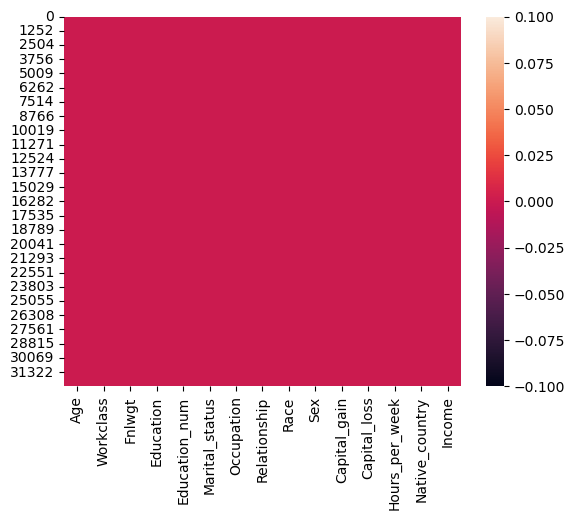

In [246]:
sns.heatmap(df.isnull())

In the dataset, there are no null values present.

In [247]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations

1. **No Null Values**:
   - The count of all values is the same, indicating there are no null values present in the dataset.

2. **Right Skewed Data**:
   - The mean is greater than the median in columns such as Age, Final Weight (fnlwgt), Capital Gain, Capital Loss, and Hours per Week, suggesting that the data may be right skewed in these columns.

3. **Potential Outliers**:
   - There is a significant difference between the 75th percentile and the maximum value in columns like Age, Capital Gain, Capital Loss, and Hours per Week, indicating the possible presence of outliers in these columns.

# 3. Data Visualization

# 1.Univariate Analysis-

<Axes: xlabel='Age', ylabel='Count'>

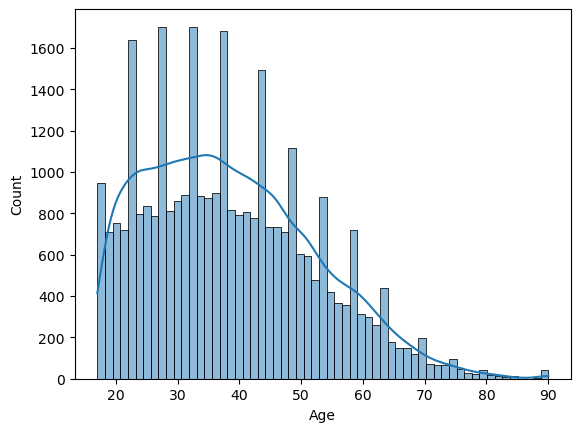

In [75]:
sns.histplot(df['Age'],kde=True)


The ages of individuals in the dataset range from 15 to 90 years.

In [30]:
sns.countplot(x=df.['Workclass'])
plt.xticks(rotation=90)

SyntaxError: invalid syntax (727674681.py, line 1)

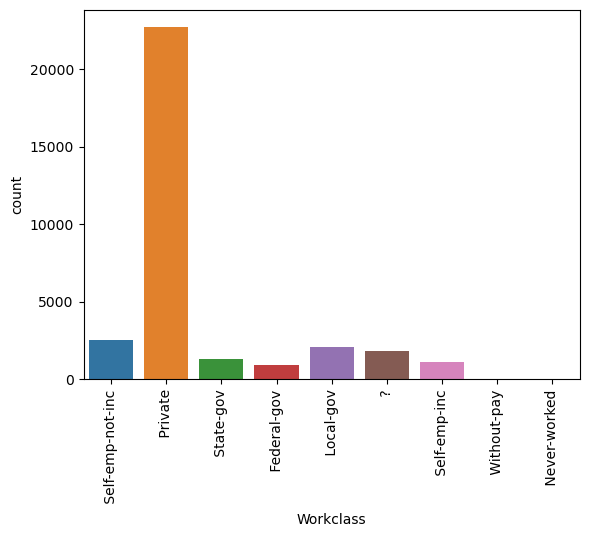

In [32]:
sns.countplot(x=df['Workclass'])
plt.xticks(rotation=90)
plt.show()


The majority of individuals are employed in private jobs, and there are no individuals categorized as "without-pay" or "never worked."

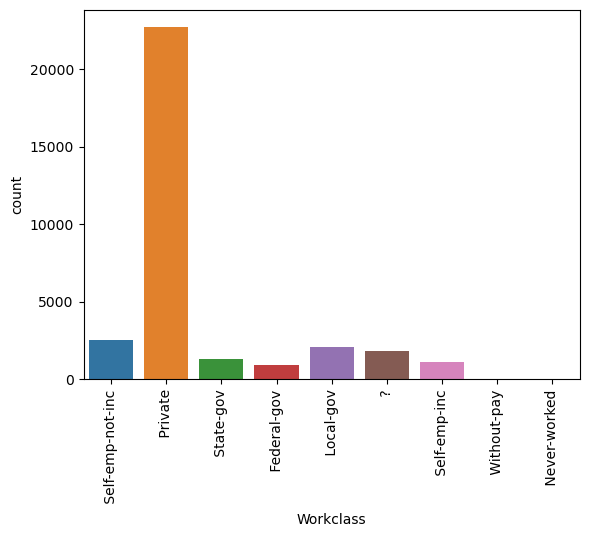

In [34]:
sns.countplot(x=df['Workclass'])
plt.xticks(rotation=90)
plt.show()


The count plot shows that the number of individuals in private jobs is significantly higher compared to other work classes. Additionally, there are no individuals classified as "without-pay" or "never worked."

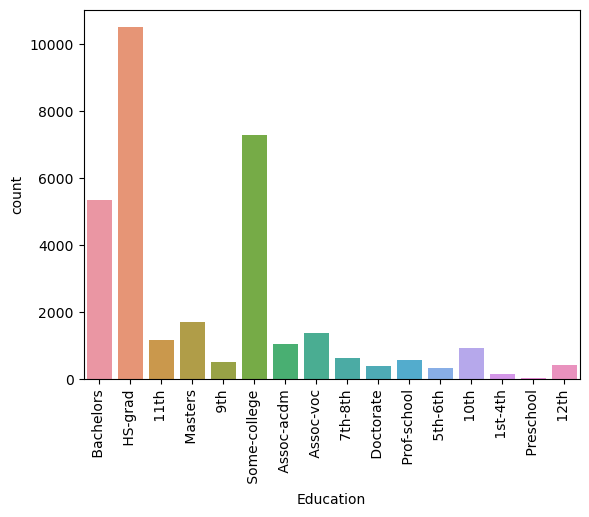

In [36]:
sns.countplot(x=df['Education'])
plt.xticks(rotation=90)
plt.show()


The highest number of individuals in the dataset have attained a high school graduation (HS-grad).

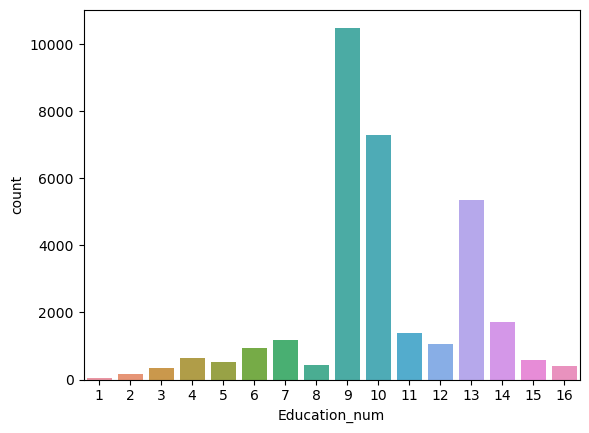

In [37]:
sns.countplot(x=df['Education_num'])
plt.show()


The count plot indicates that the highest number of individuals have an education number of 9.

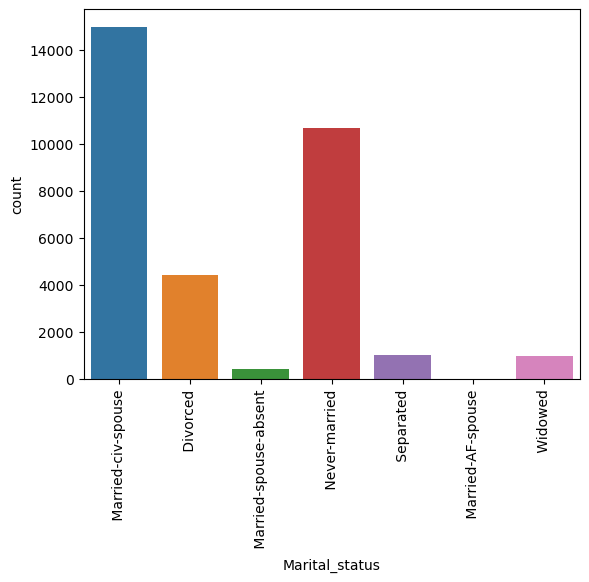

In [39]:
sns.countplot(x=df['Marital_status'])
plt.xticks(rotation=90)
plt.show()


The count plot reveals that individuals with the marital status "Married-civ-spouse" are the most numerous in the dataset.

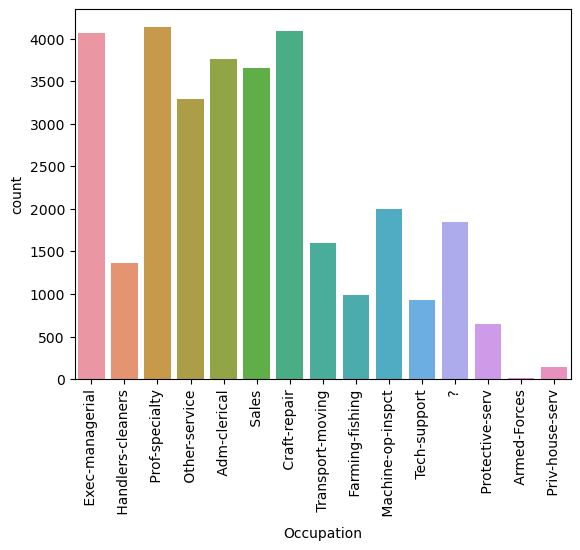

In [41]:
sns.countplot(x=df['Occupation'])
plt.xticks(rotation=90)
plt.show()


The count plot illustrates that individuals with occupations in "Prof-specialty" and "Craft-repair" are the most numerous in the dataset.

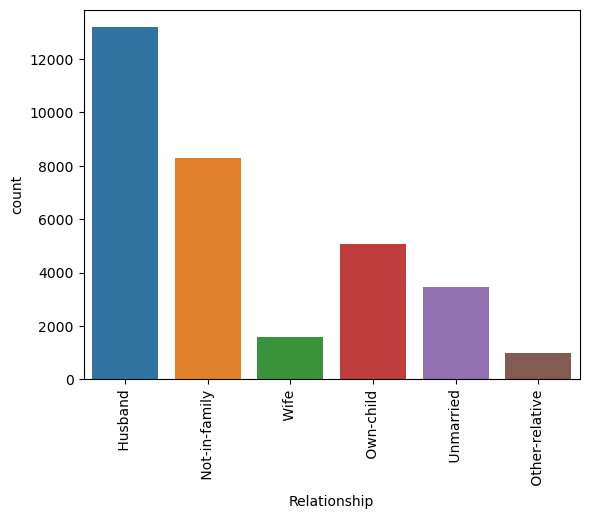

In [42]:
sns.countplot(x=df['Relationship'])
plt.xticks(rotation=90)
plt.show()


The count plot indicates that individuals with the relationship status "Husband" are the most numerous in the dataset.

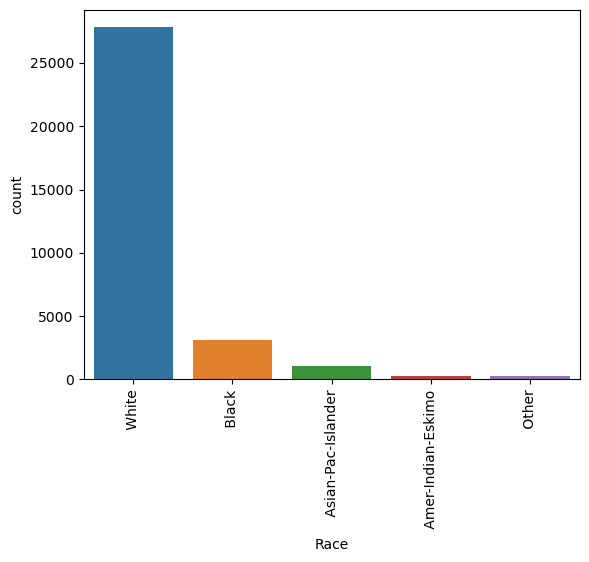

In [43]:
sns.countplot(x=df['Race'])
plt.xticks(rotation=90)
plt.show()


The count plot reveals that individuals with the White race are the most numerous in the dataset.

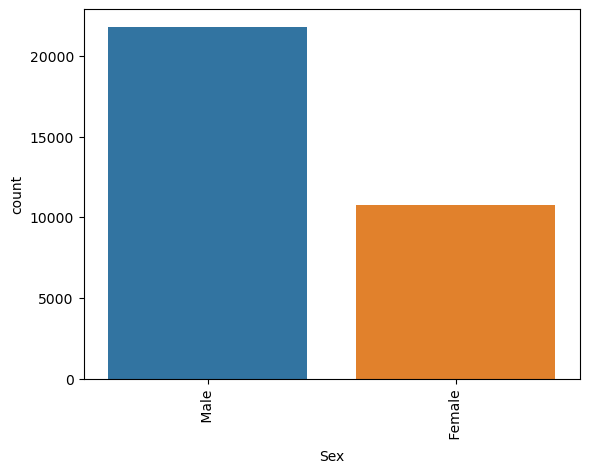

In [44]:
sns.countplot(x=df['Sex'])
plt.xticks(rotation=90)
plt.show()


The count plot shows that males are the most numerous in the dataset.

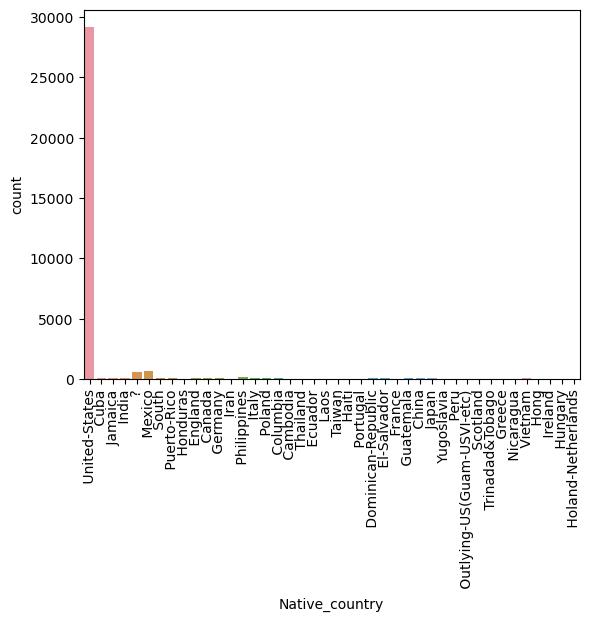

In [45]:
sns.countplot(x=df['Native_country'])
plt.xticks(rotation=90)
plt.show()


The count plot indicates that individuals from Mexico have the highest representation as a native country after the United States.

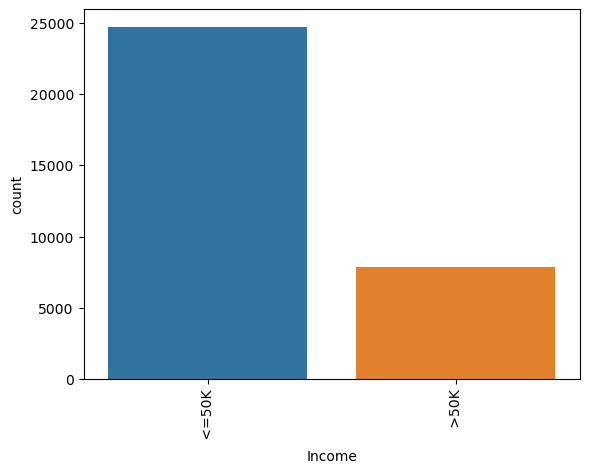

In [46]:
sns.countplot(x=df['Income'])
plt.xticks(rotation=90)
plt.show()


The count plot suggests that individuals with incomes less than or equal to $50,000 are the most numerous in the dataset.

# 2.Bivariate analysis-

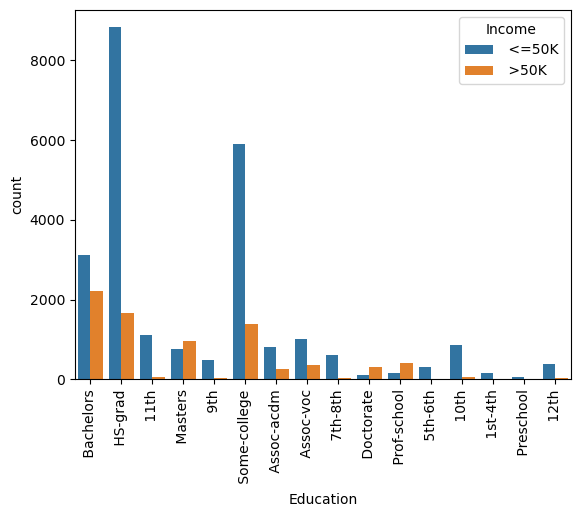

In [48]:
sns.countplot(x='Education', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot reveals that the majority of individuals with education levels of HS-grad, Some-college, and 10th have incomes less than or equal to $50,000.

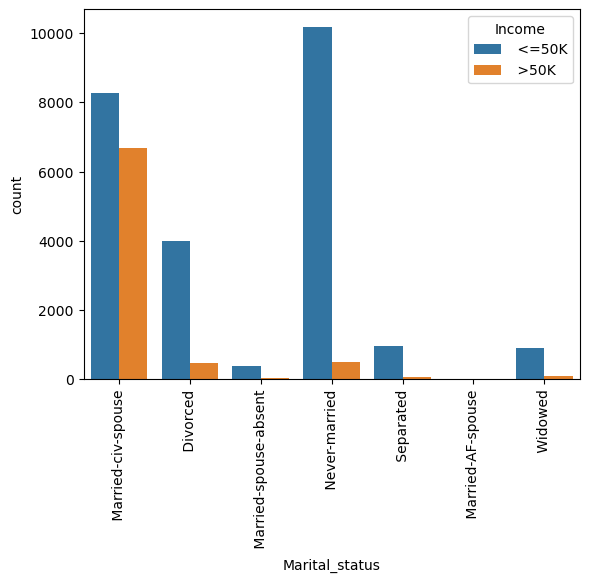

In [49]:
sns.countplot(x='Marital_status', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot indicates that individuals with marital statuses of Never-married, Separated, Widowed, and Divorced mostly have incomes less than or equal to $50,000.

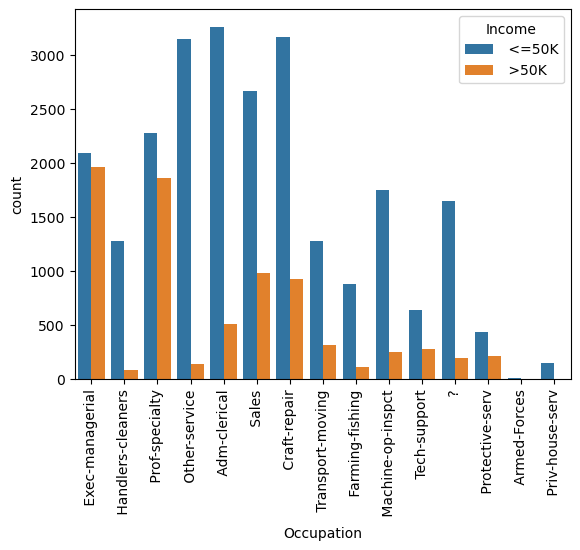

In [50]:
sns.countplot(x='Occupation', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot suggests that individuals with occupations such as Handlers-cleaners, Other-service, Adm-clerical, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, and "?" mostly have incomes less than or equal to $50,000.

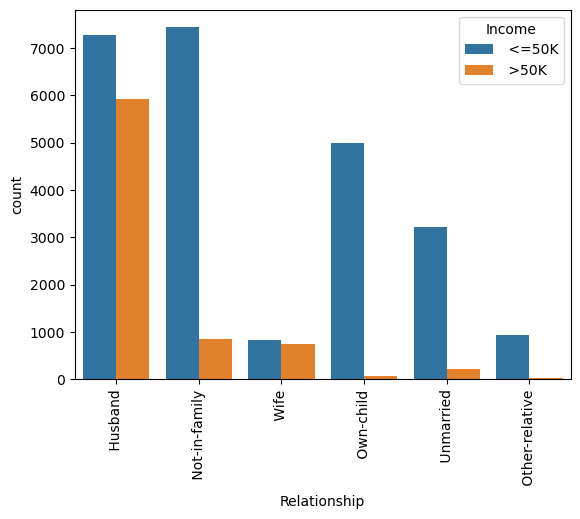

In [51]:
sns.countplot(x='Relationship', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot indicates that individuals with relationship statuses of "Not-in-family", "Own-child", "Unmarried", and "Other-relative" mostly have incomes less than or equal to $50,000.

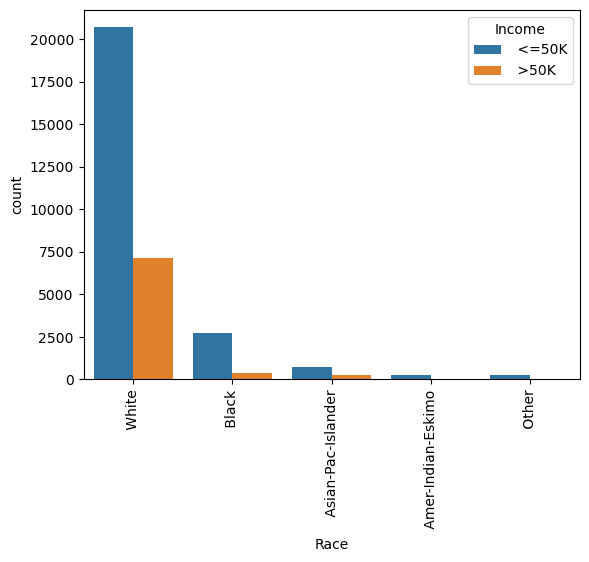

In [52]:
sns.countplot(x='Race', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot suggests that individuals with races categorized as White or Black mostly have incomes less than or equal to $50,000.

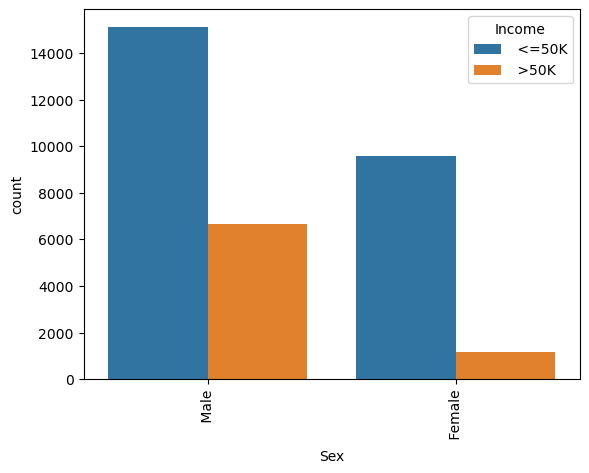

In [53]:
sns.countplot(x='Sex', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot shows that both males and females with incomes less than $50,000 are high in numbers.

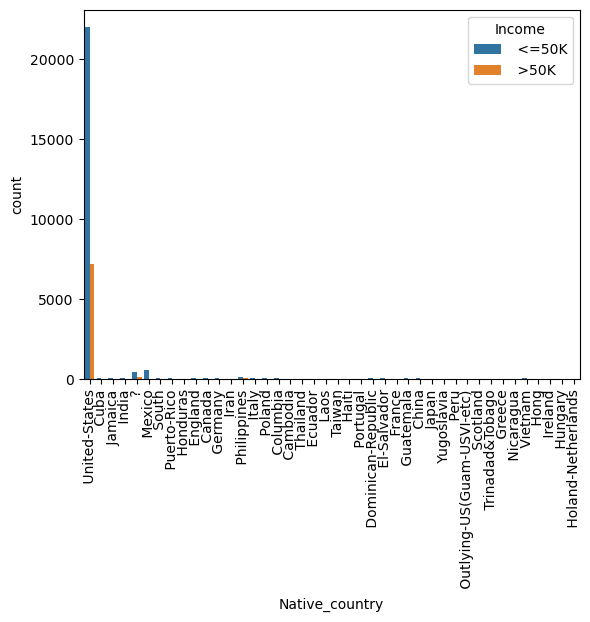

In [54]:
sns.countplot(x='Native_country', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()


The count plot suggests that individuals with the United States as their native country mostly have incomes less than or equal to $50,000.

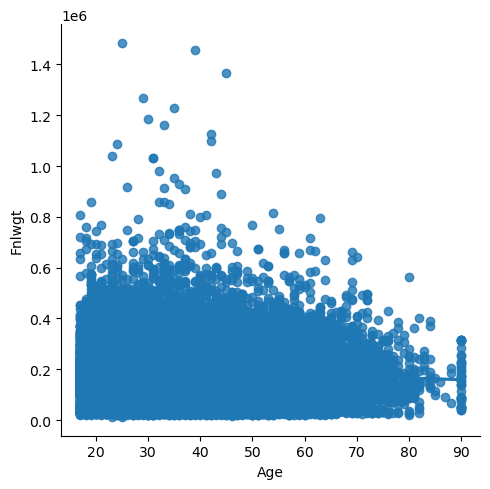

In [55]:
sns.lmplot(x='Age', y='Fnlwgt', data=df)
plt.show()


The scatter plot does not show a clear positive relationship between Age and Fnlwgt.

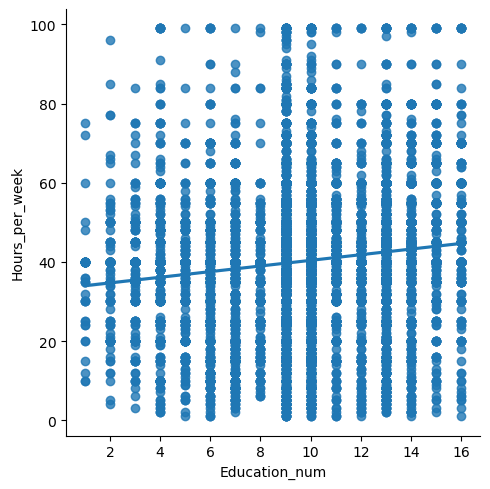

In [56]:
sns.lmplot(x='Education_num', y='Hours_per_week', data=df)
plt.show()


The scatter plot with a regression line suggests a positive relationship between Education_num and Hours_per_week.

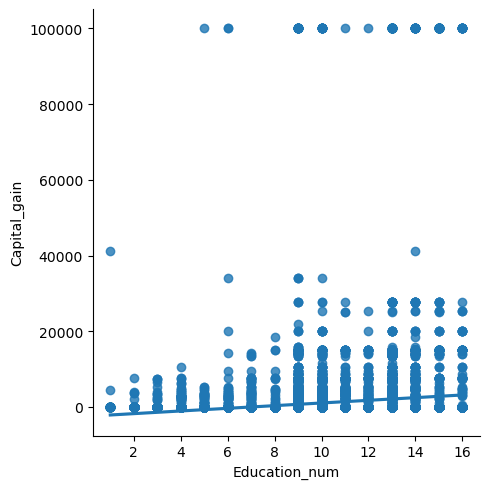

In [57]:
sns.lmplot(x='Education_num', y='Capital_gain', data=df)
plt.show()


The scatter plot with a regression line shows a slight positive relationship between Education_num and Capital_gain.

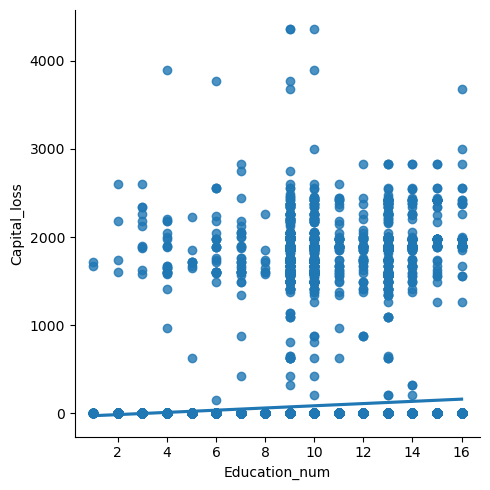

In [58]:
sns.lmplot(x='Education_num', y='Capital_loss', data=df)
plt.show()



The scatter plot with a regression line suggests a slight positive relationship between Education_num and Capital_loss.

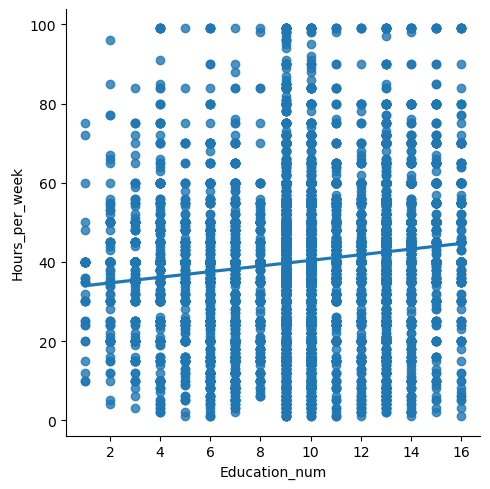

In [60]:
sns.lmplot(x='Education_num', y='Hours_per_week', data=df)
plt.show()


The scatter plot with a regression line indicates a positive relationship between Hours_per_week and Education_num.

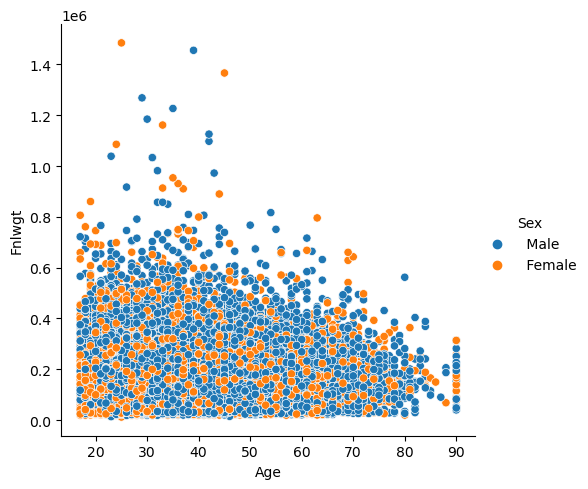

In [61]:
sns.relplot(x='Age', y='Fnlwgt', data=df, hue='Sex')
plt.show()


The scatter plot with different colors for each sex shows that there is no strong relationship between Age and Fnlwgt.

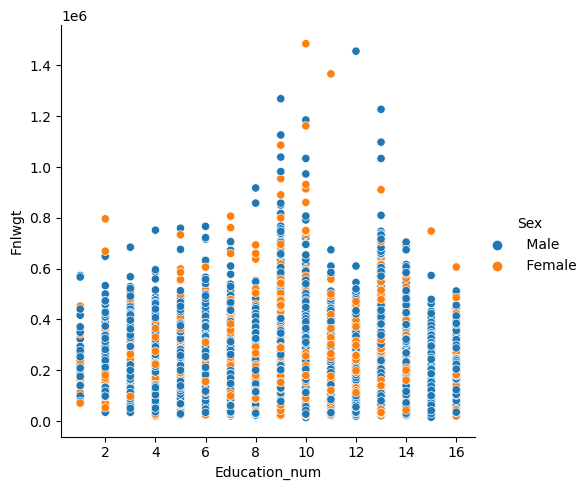

In [62]:
sns.relplot(x='Education_num', y='Fnlwgt', data=df, hue='Sex')
plt.show()


The scatter plot suggests that final weights are generally higher for Education_num between 9 and 13.

# 3.Multivariate analysis-

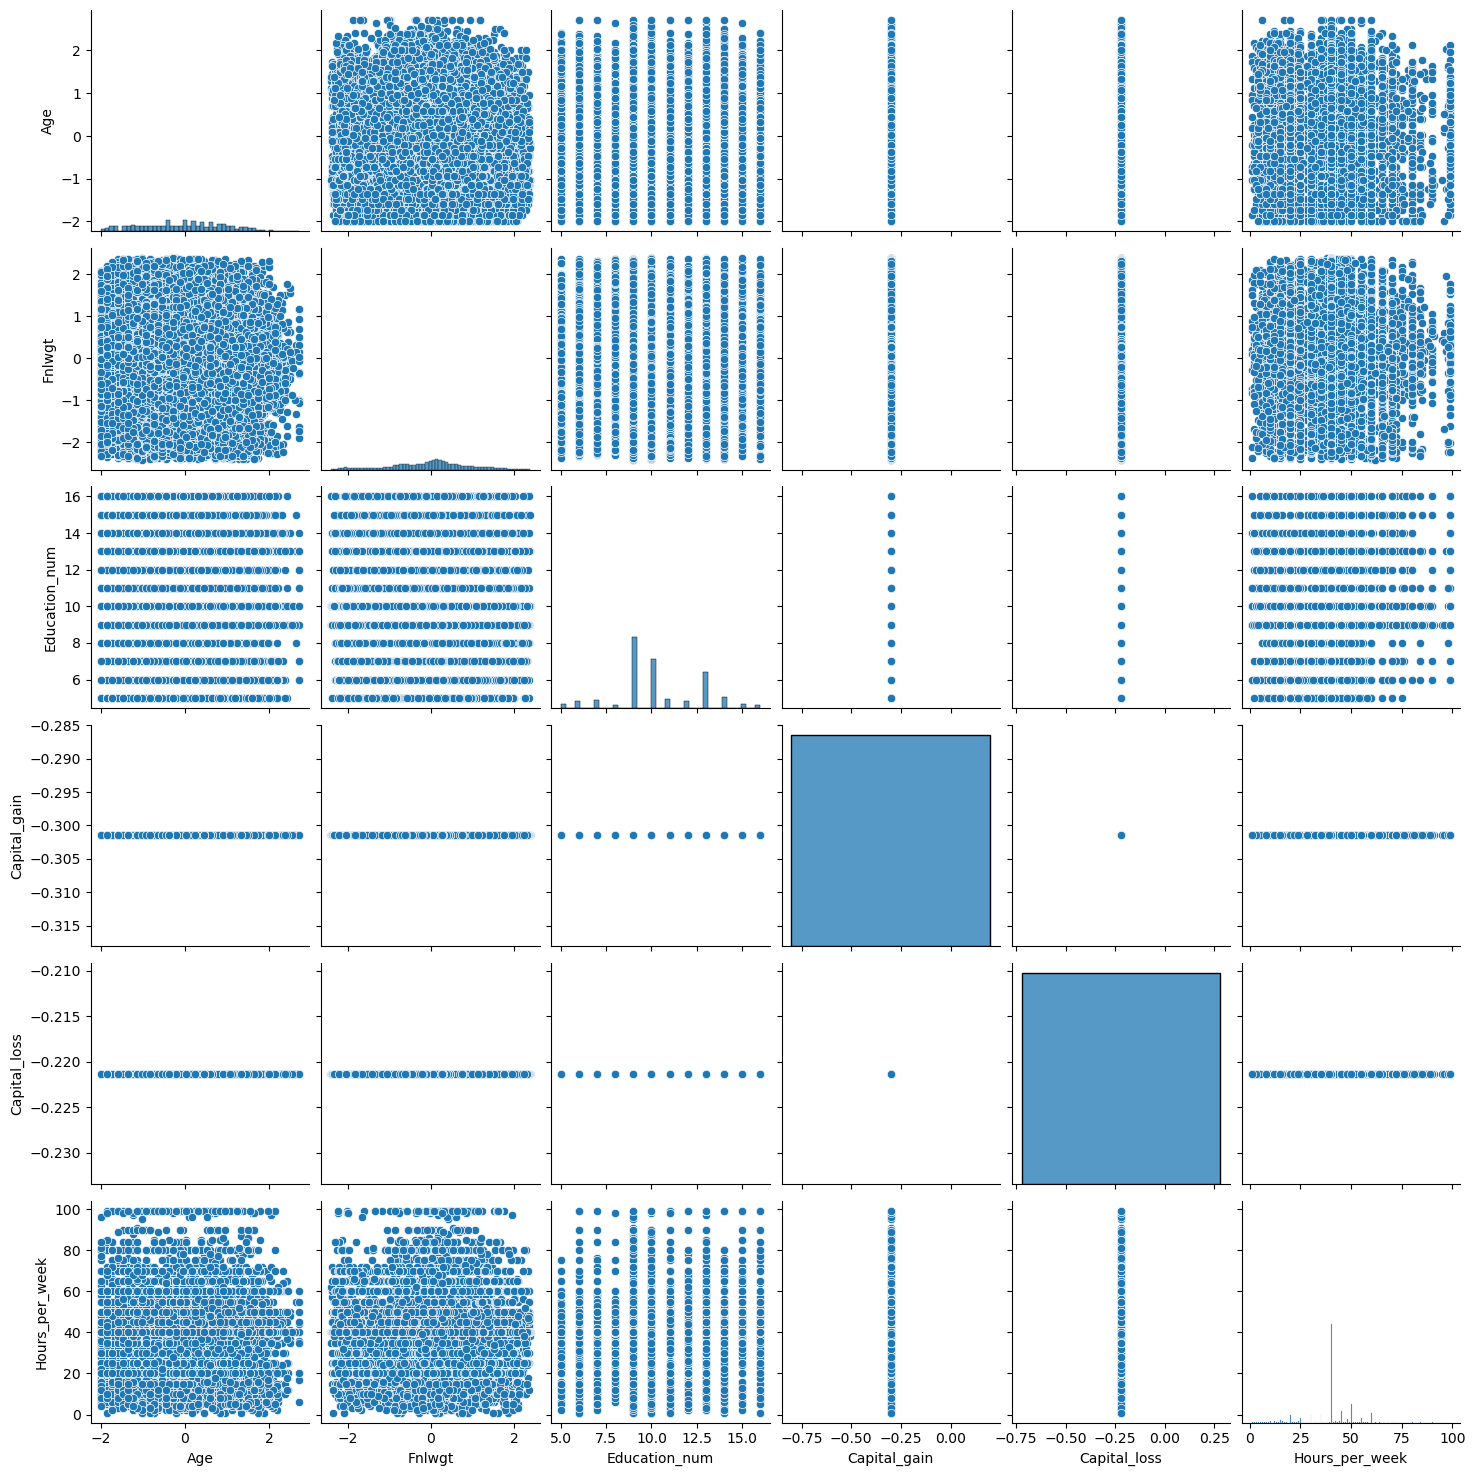

In [101]:
sns.pairplot(df)

Observations:

1. There is a positive correlation between Capital_gain and Education_num.
2. Education_num and Hours_per_week exhibit a positive correlation.
3. There is a positive correlation between Capital_gain and Age.
4. Capital_gain and Hours_per_week also show a positive correlation.
5. Age and Fnlwgt display a negative correlation.

In [248]:
num_col=[]

for i in df.columns:
    if df[i].dtypes=='int64':
        num_col.append(i)   

In [249]:
num_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [250]:
cat_col=[]

for i in df.columns:
    if df[i].dtypes=='object':
        cat_col.append(i)   

In [251]:
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

# Distribution plot-

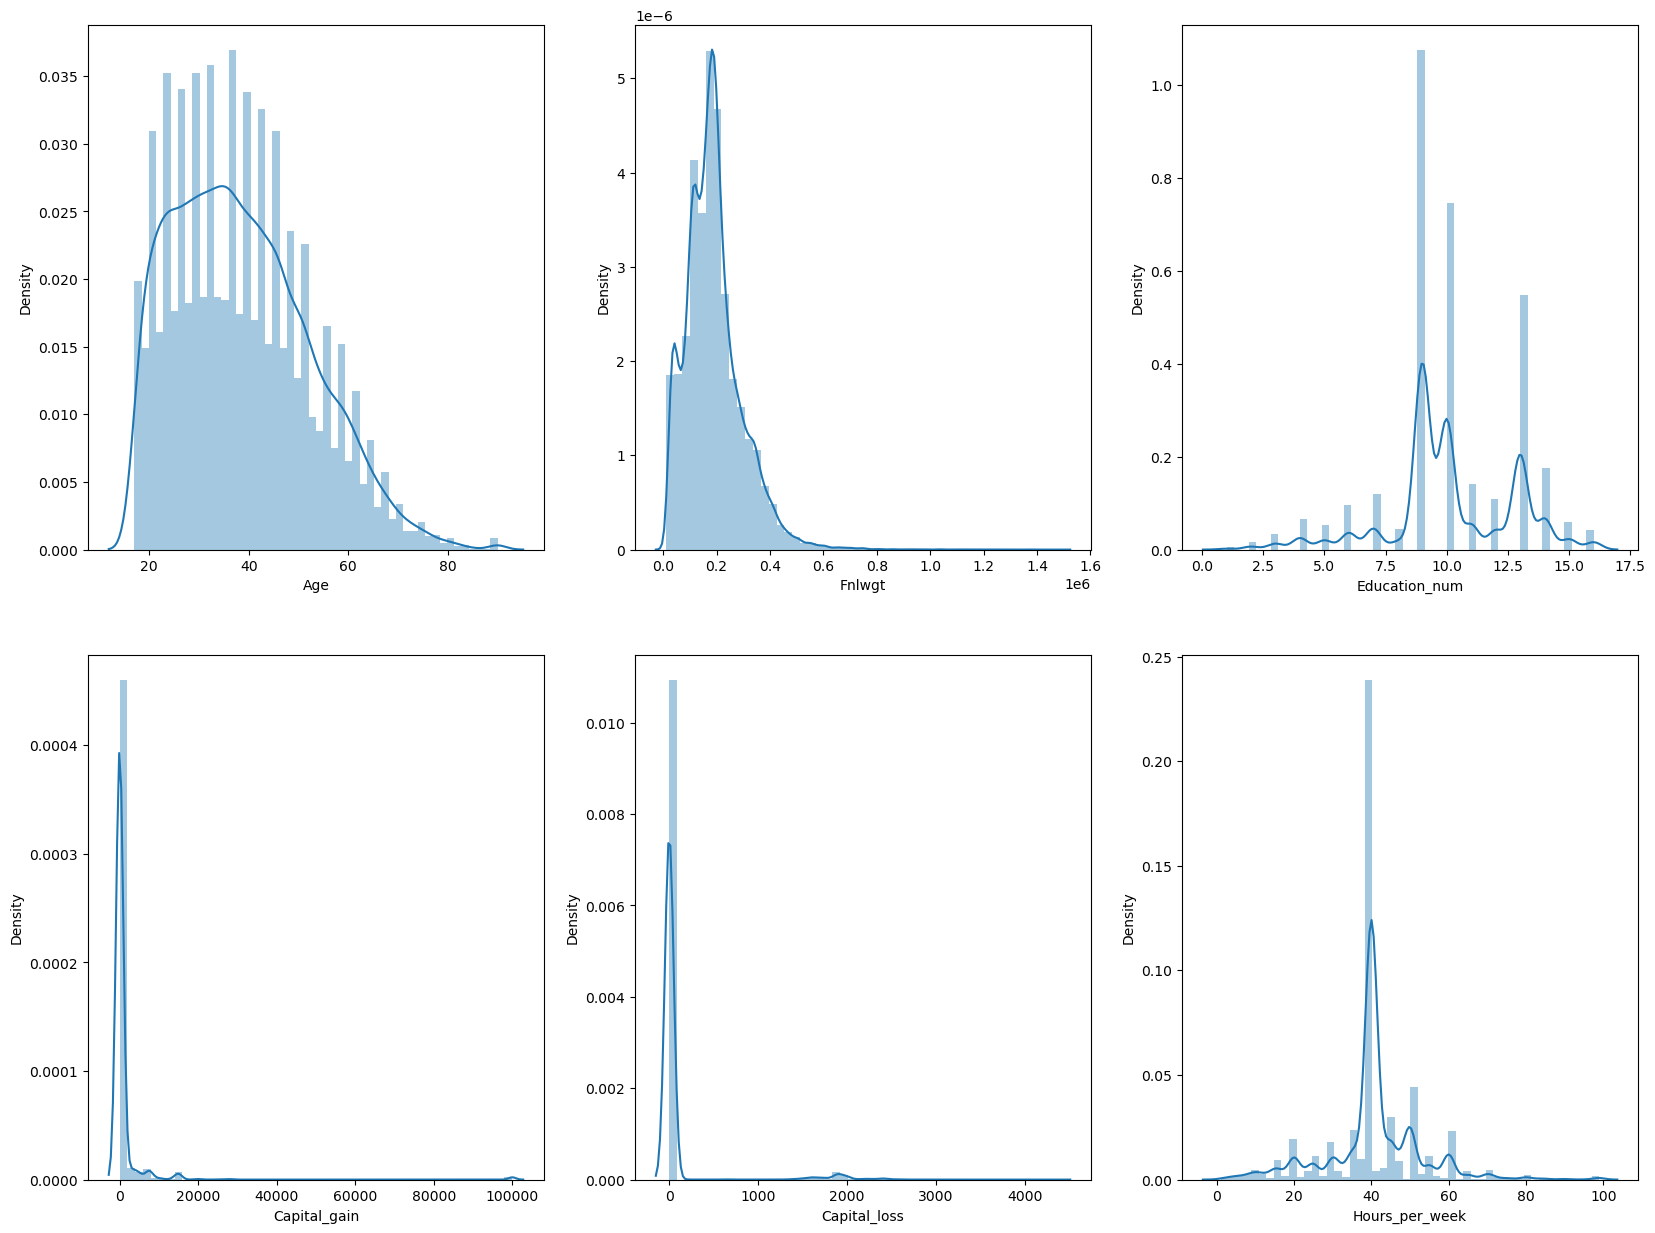

In [74]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in num_col:
    if plotnumber<=7:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()    

In [252]:
df[num_col].skew().sort_values()

Education_num     -0.309454
Hours_per_week     0.228752
Age                0.557657
Fnlwgt             1.447695
Capital_loss       4.592622
Capital_gain      11.949245
dtype: float64

The skewness values above the acceptable range (-0.5 to 0.5) indicate that the distributions of the columns like Age, Fnlwgt, Capital_gain, and Capital_loss are moderately skewed.

# Approach_SKEW-I:- Skewness removal through Power transformer-

In [253]:
from sklearn.preprocessing import PowerTransformer

In [254]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

features = ['Age','Fnlwgt','Capital_gain','Capital_loss']
x = PowerTransformer(method='yeo-johnson') 

df[features] = pd.DataFrame(x.fit_transform(df[features].values))

In [255]:
df[num_col].skew().sort_values()

Education_num    -0.309454
Age              -0.014092
Fnlwgt            0.017153
Hours_per_week    0.228752
Capital_gain      3.015495
Capital_loss      4.300759
dtype: float64

In [256]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.891733,Self-emp-not-inc,-1.089960,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.301491,-0.221299,13,United-States,<=50K
1,0.102259,Private,0.398771,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.301491,-0.221299,40,United-States,<=50K
2,1.064242,Private,0.562562,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.301491,-0.221299,40,United-States,<=50K
3,-0.732199,Private,1.340353,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.301491,-0.221299,40,Cuba,<=50K
4,0.027550,Private,0.957178,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.301491,-0.221299,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,NaN,Private,NaN,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38,United-States,<=50K
32556,NaN,Private,NaN,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States,>50K
32557,NaN,Private,NaN,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40,United-States,<=50K
32558,NaN,Private,NaN,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,NaN,NaN,20,United-States,<=50K


# Outliers

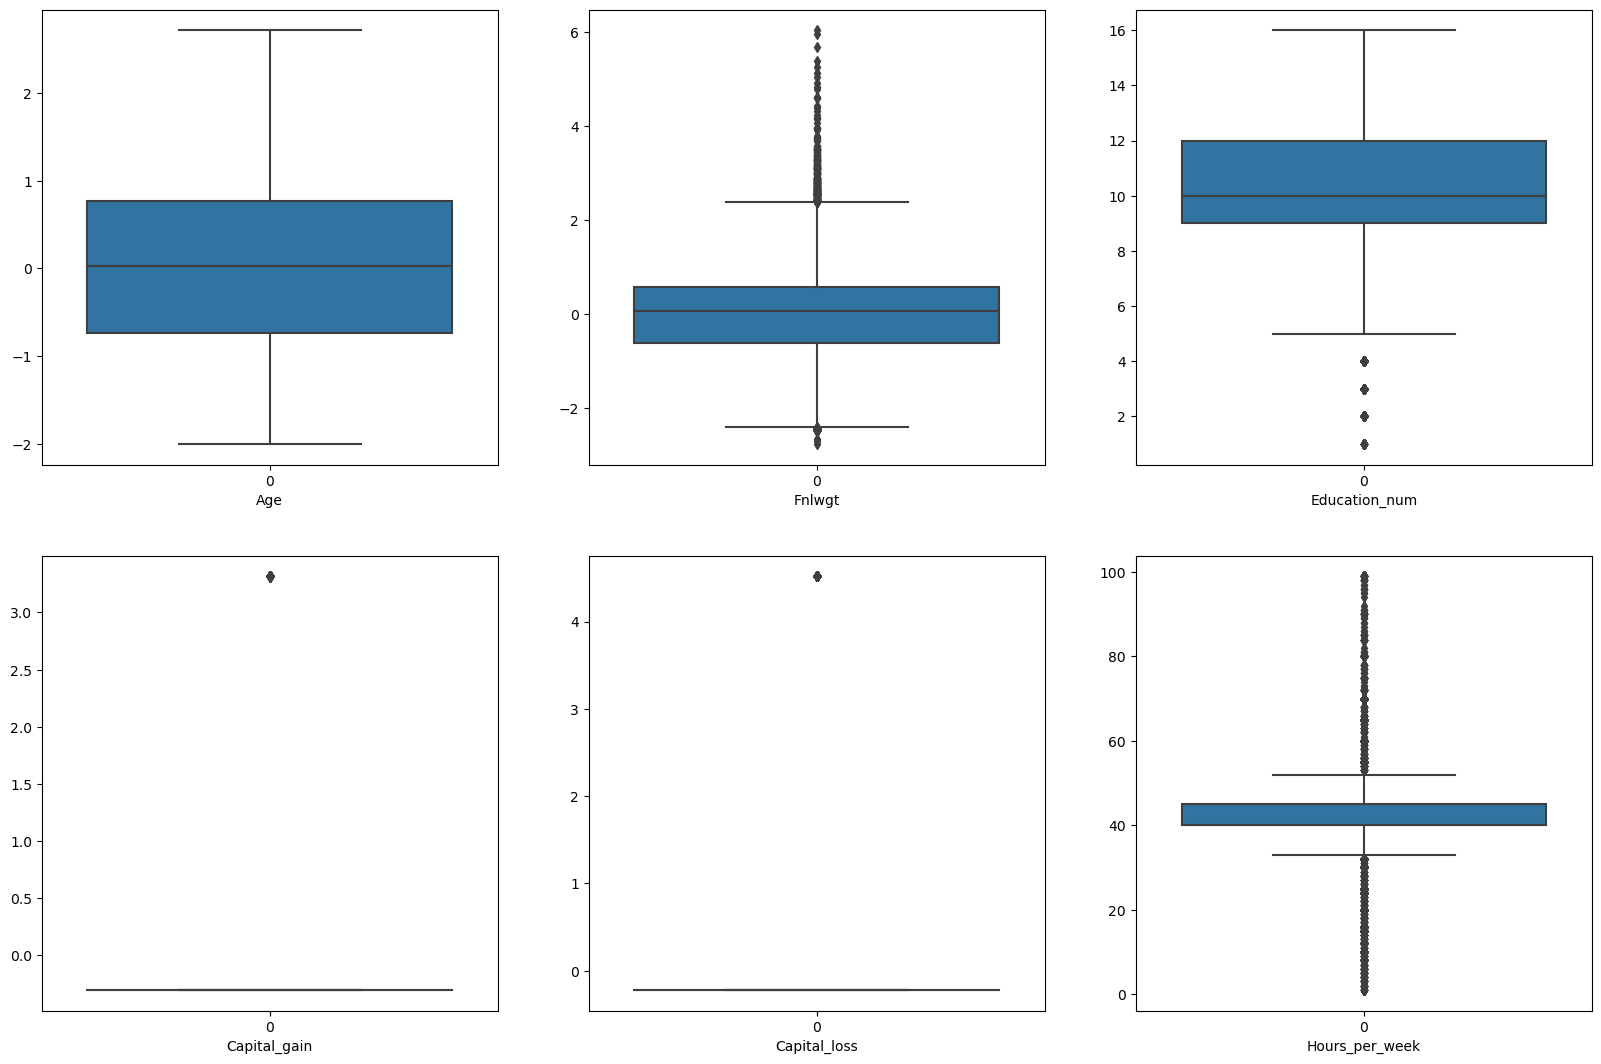

In [83]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in num_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

The presence of outliers is evident in columns such as Fnlwgt, Education_num, Capital_gain, Capital_loss, and Hours_per_week.

# Approach_Outlier-I:-Removing outliers using the IQR method.

In [257]:
# Calculate quartiles
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)

In [258]:
Fnlwgt_high=(q3.Fnlwgt+(1.5*IQR.Fnlwgt))


index=np.where(df['Fnlwgt']> Fnlwgt_high)

df=df.drop(df.index[index])

In [259]:
Capital_gain_high=(q3.Capital_gain+(1.5*IQR.Capital_gain))


index=np.where(df['Capital_gain']> Capital_gain_high)

df=df.drop(df.index[index])

In [260]:
Capital_loss_high=(q3.Capital_loss+(1.5*IQR.Capital_loss))


index=np.where(df['Capital_loss']> Capital_loss_high)

df=df.drop(df.index[index])

In [261]:
Fnlwgt_low=q1.Fnlwgt-(1.5*IQR.Fnlwgt)

index=np.where(df['Fnlwgt']<Fnlwgt_low)

df=df.drop(df.index[index])

In [262]:
Education_num_low=q1.Education_num-(1.5*IQR.Education_num)

index=np.where(df['Education_num']<Education_num_low)

df=df.drop(df.index[index])

In [263]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.891733,Self-emp-not-inc,-1.089960,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.301491,-0.221299,13,United-States,<=50K
1,0.102259,Private,0.398771,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.301491,-0.221299,40,United-States,<=50K
2,1.064242,Private,0.562562,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.301491,-0.221299,40,United-States,<=50K
3,-0.732199,Private,1.340353,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.301491,-0.221299,40,Cuba,<=50K
4,0.027550,Private,0.957178,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.301491,-0.221299,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,NaN,Private,NaN,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38,United-States,<=50K
32556,NaN,Private,NaN,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40,United-States,>50K
32557,NaN,Private,NaN,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40,United-States,<=50K
32558,NaN,Private,NaN,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,NaN,NaN,20,United-States,<=50K


In [264]:
df.isna().sum().sum()

96

In [265]:
df=df.dropna()


In [266]:
df.isna().sum().sum()

0

In [267]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.891733,Self-emp-not-inc,-1.089960,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.301491,-0.221299,13,United-States,<=50K
1,0.102259,Private,0.398771,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.301491,-0.221299,40,United-States,<=50K
2,1.064242,Private,0.562562,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.301491,-0.221299,40,United-States,<=50K
3,-0.732199,Private,1.340353,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.301491,-0.221299,40,Cuba,<=50K
4,0.027550,Private,0.957178,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.301491,-0.221299,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-1.358807,?,1.144012,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,-0.301491,-0.221299,99,United-States,<=50K
32531,-0.828514,Private,0.746761,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.301491,-0.221299,60,United-States,>50K
32532,0.246949,Private,-0.193274,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,-0.301491,-0.221299,50,Japan,>50K
32533,1.334550,Private,-0.219732,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,-0.301491,-0.221299,39,United-States,<=50K


# Data Loss

In [268]:
(32560-26911)/32560*100

17.3495085995086

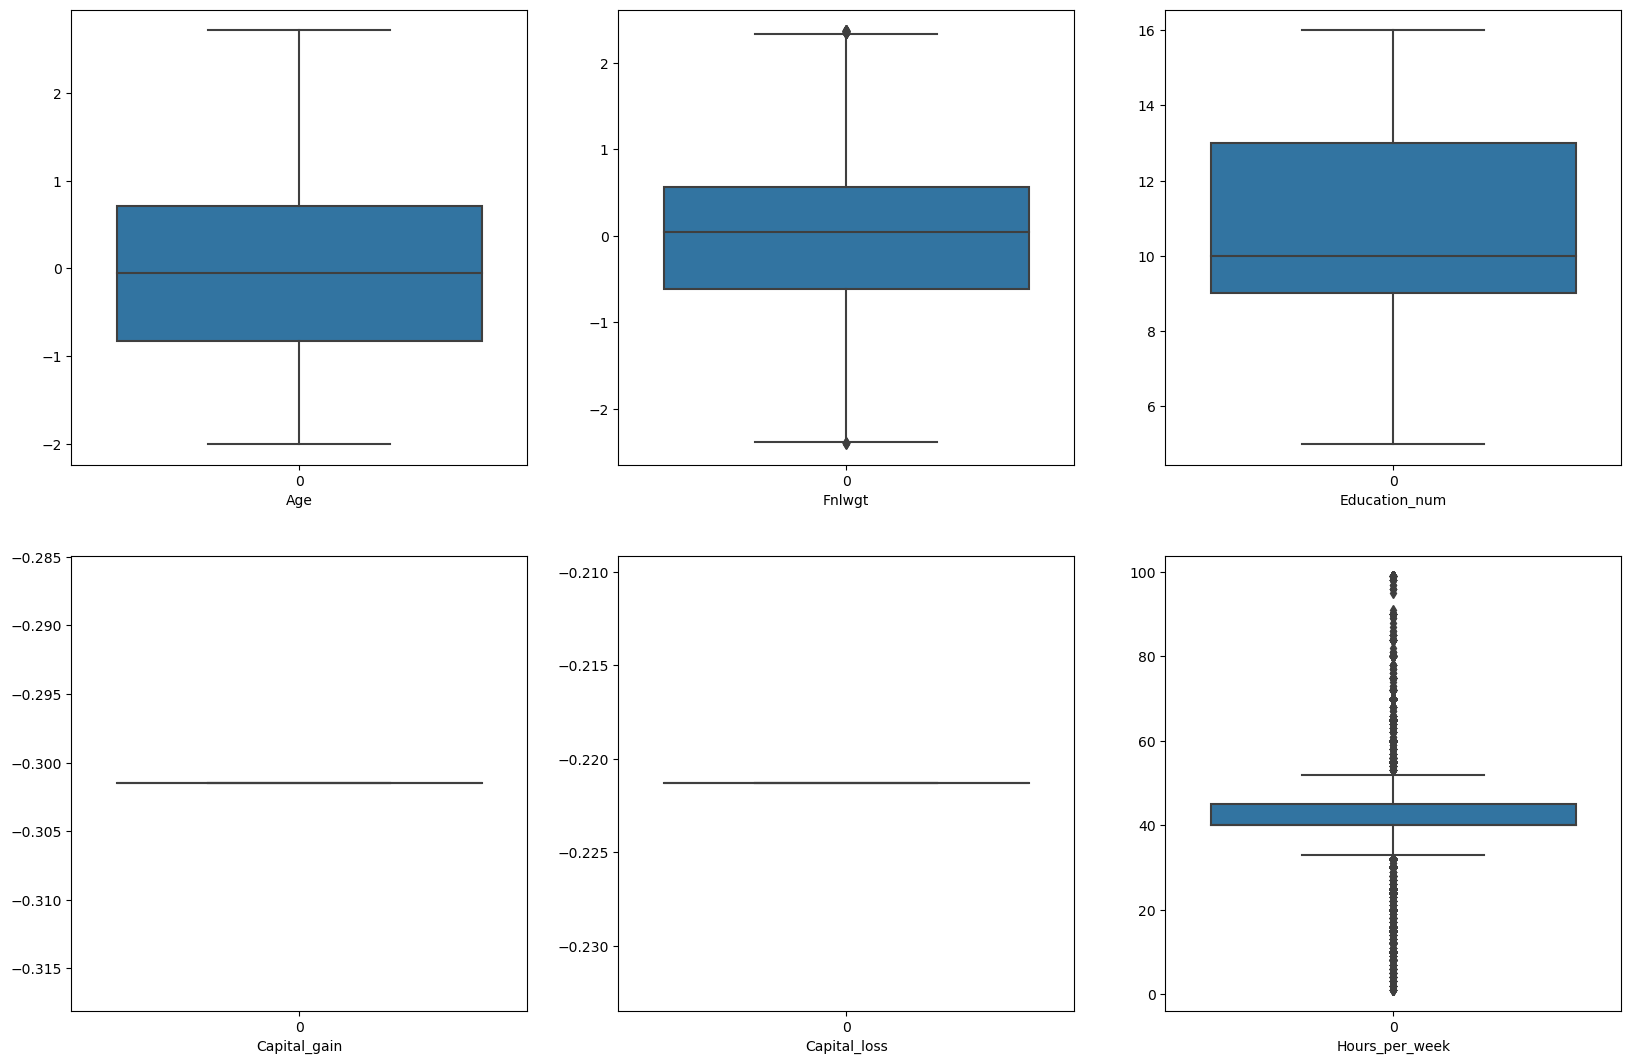

In [99]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in num_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

We have successfully removed outliers from all columns except for 'Hours_per_week', which appears to be a categorical column. While this process resulted in a loss of approximately 17% of the data, it was necessary to prevent overfitting of the model. Given the ample amount of remaining data, this loss is deemed acceptable.

# Encoding of object data using label encoding

In [269]:
from sklearn.preprocessing import LabelEncoder

In [270]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Income'] = le.fit_transform(df['Income'])


In [271]:
df[cat_col].nunique()

Workclass          9
Education         12
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

# binary encoder for the columns having many categories:-

In [272]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()

In [273]:
df[['Workclass_0','Workclass_1','Workclass_2','Workclass_3']]=be.fit_transform(df['Workclass'])

In [274]:
df[['Education_0','Education_1','Education_2','Education_3']]=be.fit_transform(df['Education'])

In [275]:
df[['Marital_status_0','Marital_status_1','Marital_status_2']]=be.fit_transform(df['Marital_status'])

In [276]:
df[['Occupation_0','Occupation_1','Occupation_2','Occupation_3']]=be.fit_transform(df['Occupation'])

In [277]:
df[['Relationship_0','Relationship_1','Relationship_2']]=be.fit_transform(df['Relationship'])

In [278]:
df[['Race_0','Race_1','Race_2']]=be.fit_transform(df['Race'])

In [279]:
df[['Native_country_0','Native_country_1','Native_country_2','Native_country_3','Native_country_4','Native_country_5']]=be.fit_transform(df['Native_country'])

After encoding the columns containing object data with numerous categories, we will proceed to remove these original columns from the dataset.

In [280]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.891733,Self-emp-not-inc,-1.089960,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,...,1,0,0,1,0,0,0,0,0,1
1,0.102259,Private,0.398771,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,...,0,0,0,1,0,0,0,0,0,1
2,1.064242,Private,0.562562,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,...,1,0,1,0,0,0,0,0,0,1
3,-0.732199,Private,1.340353,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,1,0,1,0,0,0,0,0,1,0
4,0.027550,Private,0.957178,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-1.358807,?,1.144012,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,0,...,0,0,1,1,0,0,0,0,0,1
32531,-0.828514,Private,0.746761,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,...,1,0,0,1,0,0,0,0,0,1
32532,0.246949,Private,-0.193274,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,...,1,0,1,1,0,1,1,0,1,1
32533,1.334550,Private,-0.219732,Some-college,10,Divorced,Adm-clerical,Unmarried,White,0,...,1,0,0,1,0,0,0,0,0,1


In [281]:
df=df.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Native_country'],axis=1)
df

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_0,Workclass_1,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.891733,-1.089960,13,1,-0.301491,-0.221299,13,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0.102259,0.398771,9,1,-0.301491,-0.221299,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.064242,0.562562,7,1,-0.301491,-0.221299,40,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,-0.732199,1.340353,13,0,-0.301491,-0.221299,40,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.027550,0.957178,14,0,-0.301491,-0.221299,40,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-1.358807,1.144012,13,0,-0.301491,-0.221299,99,0,0,1,...,0,0,1,1,0,0,0,0,0,1
32531,-0.828514,0.746761,16,1,-0.301491,-0.221299,60,1,0,0,...,1,0,0,1,0,0,0,0,0,1
32532,0.246949,-0.193274,13,1,-0.301491,-0.221299,50,1,0,0,...,1,0,1,1,0,1,1,0,1,1
32533,1.334550,-0.219732,10,0,-0.301491,-0.221299,39,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [282]:
df.dtypes

Age                 float64
Fnlwgt              float64
Education_num         int64
Sex                   int32
Capital_gain        float64
Capital_loss        float64
Hours_per_week        int64
Income                int32
Workclass_0           int64
Workclass_1           int64
Workclass_2           int64
Workclass_3           int64
Education_0           int64
Education_1           int64
Education_2           int64
Education_3           int64
Marital_status_0      int64
Marital_status_1      int64
Marital_status_2      int64
Occupation_0          int64
Occupation_1          int64
Occupation_2          int64
Occupation_3          int64
Relationship_0        int64
Relationship_1        int64
Relationship_2        int64
Race_0                int64
Race_1                int64
Race_2                int64
Native_country_0      int64
Native_country_1      int64
Native_country_2      int64
Native_country_3      int64
Native_country_4      int64
Native_country_5      int64
dtype: object

We have successfully encoded all the object data in the dataset.

# Correlation with the target variable:

In [283]:
df.corr()['Income'].sort_values()

Marital_status_0   -0.357253
Relationship_0     -0.314476
Education_2        -0.231288
Occupation_1       -0.155351
Marital_status_1   -0.151223
Relationship_1     -0.146312
Occupation_0       -0.089327
Race_1             -0.075985
Workclass_2        -0.070337
Race_0             -0.042115
Native_country_0   -0.020635
Workclass_0        -0.014132
Native_country_2   -0.013554
Native_country_4   -0.011410
Fnlwgt             -0.010592
Native_country_3   -0.009767
Education_1        -0.009041
Native_country_1   -0.004786
Native_country_5    0.018102
Age                 0.036684
Education_0         0.058755
Occupation_2        0.062991
Workclass_1         0.069326
Race_2              0.096587
Workclass_3         0.107210
Occupation_3        0.118077
Education_3         0.165878
Sex                 0.217716
Hours_per_week      0.229534
Education_num       0.336804
Relationship_2      0.365206
Marital_status_2    0.414556
Income              1.000000
Capital_gain             NaN
Capital_loss  

# Graphical Representation of correlationship between features & target variable-

<Axes: >

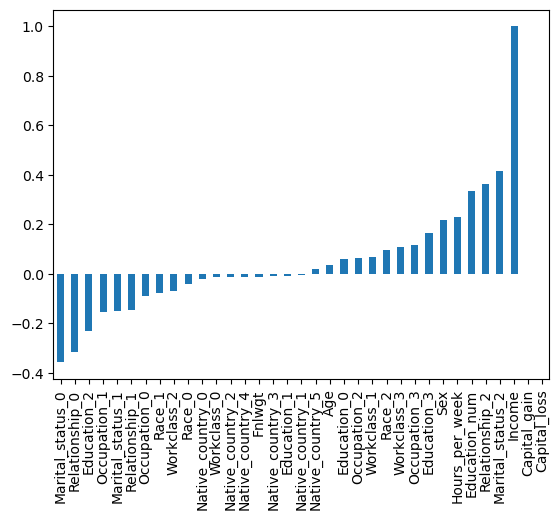

In [121]:
df.corr()['Income'].sort_values().drop(columns=['W']).plot(kind='bar')

Observations:
- Marital_status_2 and Relationship_2 columns exhibit the highest positive correlation with the target variable.
- Conversely, Marital_status_0 and Relationship_0 columns display the highest negative correlation with the target variable.
- The columns Native_country_5, Native_country_1, Fnlwgt, Education_1, Native_country_2, Native_country_4, Native_country_3, Workclass_0, and Native_country_0 demonstrate the least correlation with the target variable.

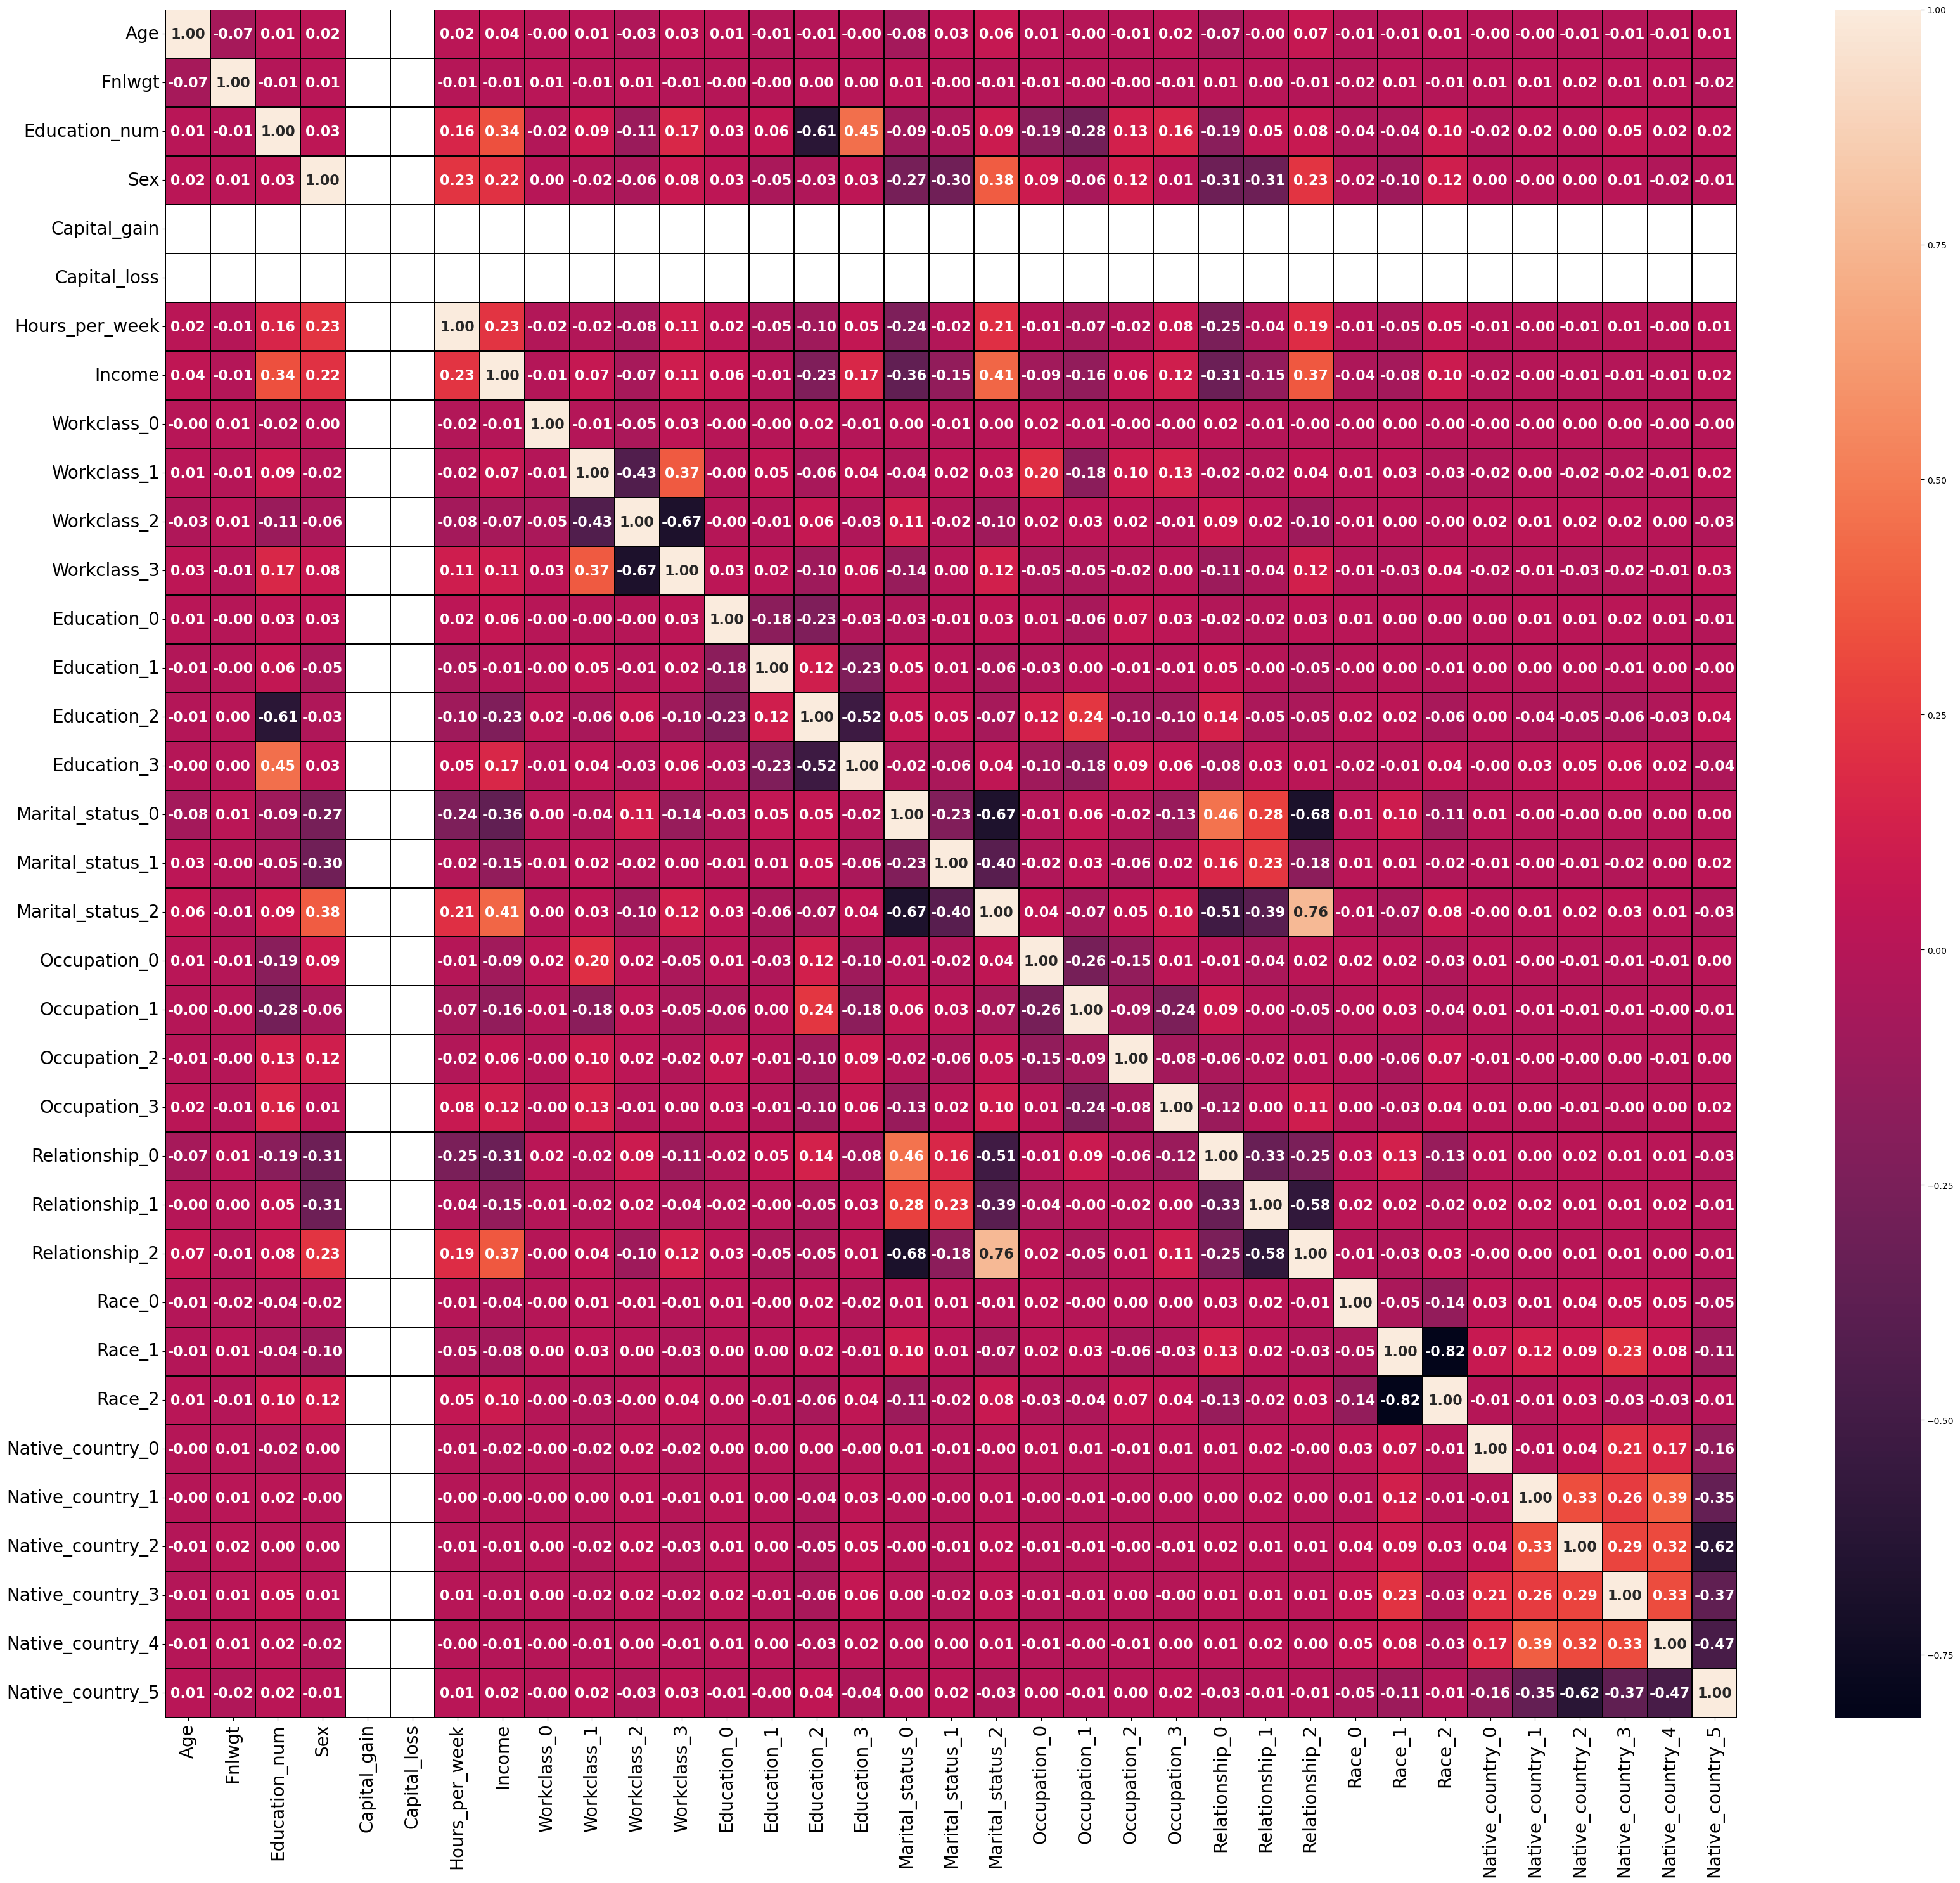

In [119]:
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Observations:
- There is a 48% negative correlation between age and marital_status_0.
- A positive correlation of 40% is observed between age and relationship_2.
- There is a 61% negative correlation between Education_num and Education_2.
- A 62% negative correlation exists between Native_country_5 and Native_country_2.
- Additionally, there is a 46% negative correlation between Native_country_5 and Native_country_4.
- Notably, a strong positive correlation of 75% is found between relationship_2 and Marital_status_2.
- Conversely, there is a 67% negative correlation between relationship_2 and Marital_status_0.
- Lastly, an 82% negative correlation is observed between race-2 and race-1.

In [284]:
df

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_0,Workclass_1,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.891733,-1.089960,13,1,-0.301491,-0.221299,13,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0.102259,0.398771,9,1,-0.301491,-0.221299,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.064242,0.562562,7,1,-0.301491,-0.221299,40,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,-0.732199,1.340353,13,0,-0.301491,-0.221299,40,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.027550,0.957178,14,0,-0.301491,-0.221299,40,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-1.358807,1.144012,13,0,-0.301491,-0.221299,99,0,0,1,...,0,0,1,1,0,0,0,0,0,1
32531,-0.828514,0.746761,16,1,-0.301491,-0.221299,60,1,0,0,...,1,0,0,1,0,0,0,0,0,1
32532,0.246949,-0.193274,13,1,-0.301491,-0.221299,50,1,0,0,...,1,0,1,1,0,1,1,0,1,1
32533,1.334550,-0.219732,10,0,-0.301491,-0.221299,39,0,0,0,...,1,0,0,1,0,0,0,0,0,1


# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [285]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [286]:
X

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.891733,-1.089960,13,1,-0.301491,-0.221299,13,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0.102259,0.398771,9,1,-0.301491,-0.221299,40,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1.064242,0.562562,7,1,-0.301491,-0.221299,40,0,0,1,...,1,0,1,0,0,0,0,0,0,1
3,-0.732199,1.340353,13,0,-0.301491,-0.221299,40,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0.027550,0.957178,14,0,-0.301491,-0.221299,40,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-1.358807,1.144012,13,0,-0.301491,-0.221299,99,0,1,1,...,0,0,1,1,0,0,0,0,0,1
32531,-0.828514,0.746761,16,1,-0.301491,-0.221299,60,0,0,1,...,1,0,0,1,0,0,0,0,0,1
32532,0.246949,-0.193274,13,1,-0.301491,-0.221299,50,0,0,1,...,1,0,1,1,0,1,1,0,1,1
32533,1.334550,-0.219732,10,0,-0.301491,-0.221299,39,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [287]:
X.shape

(26911, 34)

In [288]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32530    0
32531    1
32532    1
32533    0
32534    0
Name: Income, Length: 26911, dtype: int32

In [289]:
Y.shape

(26911,)

# Feature Scaling

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.940763,-1.113218,1.201824,0.709690,5.551115e-17,-2.775558e-17,-2.230778,-0.025142,-0.474057,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
1,0.154531,0.442711,-0.590365,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
2,1.112564,0.613896,-1.486459,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
3,-0.676501,1.426795,1.201824,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,5.342290,-4.508225
4,0.080129,1.026323,1.649871,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26906,-1.300536,1.221591,1.201824,-1.409066,5.551115e-17,-2.775558e-17,4.762061,-0.025142,2.109450,0.457693,...,-1.111867,-0.131289,2.597813,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
26907,-0.772421,0.806409,2.545965,0.709690,5.551115e-17,-2.775558e-17,1.590890,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
26908,0.298626,-0.176057,1.201824,0.709690,5.551115e-17,-2.775558e-17,0.777769,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,0.342135,-0.092438,7.014777,4.748071,-0.230352,5.342290,0.221817
26909,1.381762,-0.203709,-0.142318,-1.409066,5.551115e-17,-2.775558e-17,-0.116664,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817


# Assessing multicollinearity among features.

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [292]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF Values,Features
0,1.015831,Age
1,1.006707,Fnlwgt
2,2.010141,Education_num
3,1.649209,Sex
4,0.000000,Capital_gain
5,0.000000,Capital_loss
6,1.154105,Hours_per_week
7,1.007959,Workclass_0
8,1.448163,Workclass_1
9,2.014482,Workclass_2


Multicollinearity appears to be within an acceptable range, typically considered to be less than 10. Therefore, we can proceed with model building.

# Treating Class imbalance through Oversampling method-

In [293]:
Y.value_counts()

Income
0    20450
1     6461
Name: count, dtype: int64

In [294]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [295]:
Y.value_counts()

Income
0    20450
1    20450
Name: count, dtype: int64

In [297]:
X2=X

In [298]:
Y2=Y

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.42041108548985606 at random state 77


# Creating the training and testing data sets

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [140]:
X_train.shape

(32720, 34)

In [141]:
Y_train.shape

(32720,)

In [142]:
X_test.shape

(8180, 34)

In [143]:
Y_test.shape

(8180,)

# Machine Learning Model for Classification and Evaluation Metrics

In [145]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [146]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 79.55990220048899

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      4096
           1       0.76      0.86      0.81      4084

    accuracy                           0.80      8180
   macro avg       0.80      0.80      0.79      8180
weighted avg       0.80      0.80      0.79      8180


Confusion Matrix:
 [[3008 1088]
 [ 584 3500]]

Cross Validation Score: 79.34718826405867

Accuracy Score - Cross Validation Score is 0.212713936430319


In [147]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 85.04889975550121

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      4096
           1       0.81      0.92      0.86      4084

    accuracy                           0.85      8180
   macro avg       0.86      0.85      0.85      8180
weighted avg       0.86      0.85      0.85      8180


Confusion Matrix:
 [[3215  881]
 [ 342 3742]]

Cross Validation Score: 84.6601466992665

Accuracy Score - Cross Validation Score is 0.38875305623470524


In [148]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 88.14180929095355

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      4096
           1       0.86      0.91      0.88      4084

    accuracy                           0.88      8180
   macro avg       0.88      0.88      0.88      8180
weighted avg       0.88      0.88      0.88      8180


Confusion Matrix:
 [[3486  610]
 [ 360 3724]]

Cross Validation Score: 88.20782396088018

Accuracy Score - Cross Validation Score is -0.06601466992663063


In [149]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 81.56479217603912

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      4096
           1       0.77      0.90      0.83      4084

    accuracy                           0.82      8180
   macro avg       0.83      0.82      0.81      8180
weighted avg       0.83      0.82      0.81      8180


Confusion Matrix:
 [[2990 1106]
 [ 402 3682]]

Cross Validation Score: 81.31295843520783

Accuracy Score - Cross Validation Score is 0.2518337408312874


In [150]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 82.1760391198044

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4096
           1       0.79      0.88      0.83      4084

    accuracy                           0.82      8180
   macro avg       0.83      0.82      0.82      8180
weighted avg       0.83      0.82      0.82      8180


Confusion Matrix:
 [[3113  983]
 [ 475 3609]]

Cross Validation Score: 81.78484107579462

Accuracy Score - Cross Validation Score is 0.39119804400978353


In [151]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 83.2640586797066

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      4096
           1       0.82      0.85      0.83      4084

    accuracy                           0.83      8180
   macro avg       0.83      0.83      0.83      8180
weighted avg       0.83      0.83      0.83      8180


Confusion Matrix:
 [[3359  737]
 [ 632 3452]]

Cross Validation Score: 81.84841075794621

Accuracy Score - Cross Validation Score is 1.4156479217603817


In [152]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 87.51833740831296

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4096
           1       0.87      0.89      0.88      4084

    accuracy                           0.88      8180
   macro avg       0.88      0.88      0.88      8180
weighted avg       0.88      0.88      0.88      8180


Confusion Matrix:
 [[3543  553]
 [ 468 3616]]

Cross Validation Score: 85.72127139364302

Accuracy Score - Cross Validation Score is 1.7970660146699373


# ETRA TREES CLASSIFIER IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [164]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid ={'criterion':['gini','entropy'],
           'random_state':[10,50],
           'max_depth':[0,10],
           'n_jobs':[-1,1],
           'n_estimators':[50,100]}

In [165]:
ETC=ExtraTreesClassifier()

In [166]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [167]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [0, 10],
                         'n_estimators': [50, 100], 'n_jobs': [-1, 1],
                         'random_state': [10, 50]})

In [168]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 50}

In [173]:
final_model_2=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)

In [174]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

85.74572127139363


# Saving the model

In [175]:
import joblib

filename = "FinalModel_2_1.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_2_1.pkl']

In [176]:
model=joblib.load("FinalModel_2_1.pkl")

prediction=model.predict(X_test)
prediction

array([0, 1, 0, ..., 1, 0, 1])

In [177]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [178]:
df.tail()

,Predicted,Original
8175,1,0
8176,1,1
8177,1,1
8178,0,0
8179,1,1


# Model-II:-Feature selection using Principal Component Analysis

In [179]:
X

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.940763,-1.113218,1.201824,0.709690,5.551115e-17,-2.775558e-17,-2.230778,-0.025142,-0.474057,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
1,0.154531,0.442711,-0.590365,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
2,1.112564,0.613896,-1.486459,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
3,-0.676501,1.426795,1.201824,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,5.342290,-4.508225
4,0.080129,1.026323,1.649871,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,-0.433459,-0.214204,2.097918,0.709690,5.551115e-17,-2.775558e-17,0.777769,-0.025142,2.109450,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40896,-0.330600,1.401159,2.097918,0.709690,5.551115e-17,-2.775558e-17,0.848683,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40897,0.004054,-0.736393,1.649871,0.709690,5.551115e-17,-2.775558e-17,1.495958,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40898,-1.034170,-2.413228,1.201824,0.709690,5.551115e-17,-2.775558e-17,-0.047698,-0.025142,2.109450,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817


In [180]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40895    1
40896    1
40897    1
40898    1
40899    1
Name: Income, Length: 40900, dtype: int32

# Implementing Principal Component Analysis for feature selection.

In [181]:
from sklearn.decomposition import PCA 

In [182]:
pca=PCA()
pca.fit_transform(X)

array([[-2.62671458e+00,  9.57148128e-03, -1.49541190e+00, ...,
         1.69123025e-02, -7.22045948e-16, -4.88971386e-17],
       [ 1.94372525e+00, -3.66006152e-01, -5.70659248e-01, ...,
        -1.48071104e-01,  2.78124695e-16, -1.60632674e-16],
       [-4.29416800e-02, -8.27581721e-02,  1.42048701e+00, ...,
        -5.25129008e-02, -2.45045421e-15,  1.05161581e-16],
       ...,
       [-2.11073176e+00, -2.84362182e-01, -1.09814881e-01, ...,
         3.49122500e-02,  3.19526571e-17, -2.54299154e-18],
       [-3.40311453e+00, -8.09106425e-02, -2.03269205e+00, ...,
         1.30658609e-02, -4.60268564e-18,  4.70907730e-18],
       [-5.74594570e-01, -1.07782331e+00,  1.46303772e+00, ...,
         6.02025404e-03,  2.05659266e-17, -1.40690763e-18]])

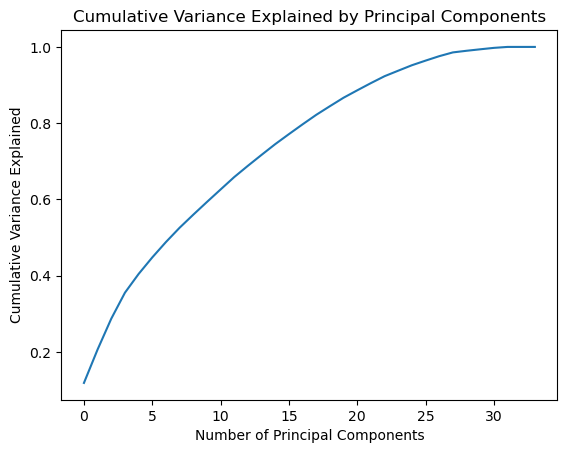

In [183]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   
plt.xlabel('Number of Principal Components') 
plt.ylabel('Cumulative Variance Explained')   
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

Based on the plot above, it's evident that 30 features are adequate to capture the majority of the variance. Therefore, we will extract 30 principal components for model construction.

In [185]:
pca=PCA(n_components=30)
new_components=pca.fit_transform(X)

In [186]:
princi_comp = pd.DataFrame(new_components, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.626715,0.009571,-1.495412,1.026115,0.136209,0.050752,-0.076723,0.060001,-1.559465,-1.079819,...,-1.970268,-1.446251,-0.322997,-0.094092,-0.161999,0.139411,-0.108425,0.075460,-0.060698,-0.073034
1,1.943725,-0.366006,-0.570659,-0.664263,-1.114714,0.257591,0.140707,1.339009,0.853677,0.588655,...,-1.378230,-0.658786,-0.158375,-1.242020,0.878000,0.338024,-0.047058,-0.114287,0.101858,0.059940
2,-0.042942,-0.082758,1.420487,-0.358943,3.987973,1.017589,-0.399872,0.405777,0.068353,0.531692,...,-1.414885,0.277407,0.121490,0.072033,1.486763,0.482748,-0.044799,1.198843,-0.088540,-0.149477
3,-0.712386,5.596122,0.853927,0.049430,2.379409,-0.511651,-1.226840,0.750629,0.498758,0.793304,...,-0.627780,1.887503,-3.429707,0.335540,-0.388088,-0.285722,-1.707022,0.097586,0.208114,0.388906
4,-0.704731,0.178071,-0.889344,-0.974813,-0.439791,-2.069695,-1.835660,0.163372,0.332565,-0.103439,...,0.115595,0.927982,0.328290,-0.552402,-0.443723,0.087770,-0.100525,-0.167397,0.217222,0.550525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,-3.100459,-0.030508,-1.475817,0.767074,0.313630,0.583670,1.705136,-0.205563,1.497555,-0.275278,...,0.662885,0.231543,-0.087803,1.152238,1.307431,2.206212,0.046690,-1.275643,0.036883,0.016146
40896,-0.033738,1.029229,-2.673666,-1.651629,-0.449627,-0.084501,1.258276,1.602060,1.863285,0.208092,...,-0.405980,-0.907202,-0.360416,1.303442,1.469518,0.308695,0.167174,-1.179759,0.178182,0.175324
40897,-2.110732,-0.284362,-0.109815,-1.345297,-0.295381,-0.822100,-1.613053,-0.902699,1.271802,-0.059384,...,0.103801,0.343661,0.138168,-0.571891,-0.816865,0.097843,-0.069586,-0.029849,0.051442,-0.022499
40898,-3.403115,-0.080911,-2.032692,2.033735,-0.072011,0.589171,0.101926,-0.685352,-0.333270,-0.357899,...,-0.211407,-0.270424,-0.047404,-0.352144,-0.050155,0.230013,-0.111315,0.323751,-0.008886,-0.061641


In [187]:
princi_comp.shape

(40900, 30)

In [188]:
X=princi_comp

In [189]:
Y.shape

(40900,)

In [190]:
X.shape

(40900, 30)

In [191]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.4204772993831225 at random state 158


# Machine Learning Model for Classification and Evaluation Metrics

In [193]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [194]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 79.5354523227384

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78      4096
           1       0.76      0.85      0.81      4084

    accuracy                           0.80      8180
   macro avg       0.80      0.80      0.79      8180
weighted avg       0.80      0.80      0.79      8180


Confusion Matrix:
 [[3015 1081]
 [ 593 3491]]

Cross Validation Score: 79.35452322738386

Accuracy Score - Cross Validation Score is 0.1809290953545286


In [195]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 85.09779951100245

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      4096
           1       0.81      0.91      0.86      4084

    accuracy                           0.85      8180
   macro avg       0.86      0.85      0.85      8180
weighted avg       0.86      0.85      0.85      8180


Confusion Matrix:
 [[3244  852]
 [ 367 3717]]

Cross Validation Score: 85.34718826405869

Accuracy Score - Cross Validation Score is -0.24938875305623753


In [196]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 87.55501222493888

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4096
           1       0.86      0.90      0.88      4084

    accuracy                           0.88      8180
   macro avg       0.88      0.88      0.88      8180
weighted avg       0.88      0.88      0.88      8180


Confusion Matrix:
 [[3479  617]
 [ 401 3683]]

Cross Validation Score: 87.7921760391198

Accuracy Score - Cross Validation Score is -0.23716381418091714


In [197]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 81.44254278728607

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      4096
           1       0.77      0.90      0.83      4084

    accuracy                           0.81      8180
   macro avg       0.82      0.81      0.81      8180
weighted avg       0.82      0.81      0.81      8180


Confusion Matrix:
 [[2983 1113]
 [ 405 3679]]

Cross Validation Score: 81.32518337408314

Accuracy Score - Cross Validation Score is 0.11735941320293364


In [198]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 82.4083129584352

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4096
           1       0.79      0.89      0.83      4084

    accuracy                           0.82      8180
   macro avg       0.83      0.82      0.82      8180
weighted avg       0.83      0.82      0.82      8180


Confusion Matrix:
 [[3118  978]
 [ 461 3623]]

Cross Validation Score: 81.94621026894866

Accuracy Score - Cross Validation Score is 0.4621026894865423


In [199]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 81.5281173594132

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      4096
           1       0.78      0.88      0.83      4084

    accuracy                           0.82      8180
   macro avg       0.82      0.82      0.81      8180
weighted avg       0.82      0.82      0.81      8180


Confusion Matrix:
 [[3069 1027]
 [ 484 3600]]

Cross Validation Score: 81.28606356968214

Accuracy Score - Cross Validation Score is 0.2420537897310595


In [200]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 84.41320293398533

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4096
           1       0.81      0.89      0.85      4084

    accuracy                           0.84      8180
   macro avg       0.85      0.84      0.84      8180
weighted avg       0.85      0.84      0.84      8180


Confusion Matrix:
 [[3268  828]
 [ 447 3637]]

Cross Validation Score: 84.6674816625917

Accuracy Score - Cross Validation Score is -0.2542787286063657


# AGAIN ETRA TREES CLASSIFIER IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [202]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid ={'criterion':['gini','entropy'],
           'random_state':[10,50],
           'max_depth':[0,10],
           'n_jobs':[-1,1],
           'n_estimators':[50,100,]}

In [203]:
ETC=ExtraTreesClassifier()

In [204]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [205]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [0, 10],
                         'n_estimators': [50, 100], 'n_jobs': [-1, 1],
                         'random_state': [10, 50]})

In [206]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 50}

In [217]:
final_model_2=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)

In [218]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

85.74572127139363


# Saving the model

In [219]:
filename = "FinalModel_2_2.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_2_2.pkl']

In [220]:
model=joblib.load("FinalModel_2_2.pkl")

prediction=model.predict(X_test)
prediction

array([0, 1, 0, ..., 1, 0, 1])

In [221]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [222]:
df.tail()

,Predicted,Original
8175,1,0
8176,1,1
8177,1,1
8178,0,0
8179,1,1


---

----

# Model-III:- Applying Select K-Best feature method for feature selection

In [300]:
X2

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.940763,-1.113218,1.201824,0.709690,5.551115e-17,-2.775558e-17,-2.230778,-0.025142,-0.474057,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
1,0.154531,0.442711,-0.590365,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
2,1.112564,0.613896,-1.486459,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
3,-0.676501,1.426795,1.201824,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,5.342290,-4.508225
4,0.080129,1.026323,1.649871,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,-0.136158,0.719611,-0.590365,0.709690,5.551115e-17,-2.775558e-17,0.717550,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40896,-0.649225,-1.674991,-0.644892,0.709690,5.551115e-17,-2.775558e-17,1.114780,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,3.002790,-0.187186,0.221817
40897,-1.129504,-2.018722,1.201824,0.709690,5.551115e-17,-2.775558e-17,0.021572,-0.025142,2.109450,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40898,0.198368,-0.027394,1.201824,0.709690,5.551115e-17,-2.775558e-17,0.371209,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,4.341183,-0.187186,0.221817


In [301]:
Y2

0        0
1        0
2        0
3        0
4        0
        ..
40895    1
40896    1
40897    1
40898    1
40899    1
Name: Income, Length: 40900, dtype: int32

In [302]:
X=X2

In [303]:
X

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_0,Workclass_1,Workclass_2,...,Relationship_2,Race_0,Race_1,Race_2,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.940763,-1.113218,1.201824,0.709690,5.551115e-17,-2.775558e-17,-2.230778,-0.025142,-0.474057,-2.184869,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
1,0.154531,0.442711,-0.590365,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
2,1.112564,0.613896,-1.486459,0.709690,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
3,-0.676501,1.426795,1.201824,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,-0.230352,5.342290,-4.508225
4,0.080129,1.026323,1.649871,-1.409066,5.551115e-17,-2.775558e-17,-0.035352,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,-0.136158,0.719611,-0.590365,0.709690,5.551115e-17,-2.775558e-17,0.717550,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40896,-0.649225,-1.674991,-0.644892,0.709690,5.551115e-17,-2.775558e-17,1.114780,-0.025142,-0.474057,0.457693,...,0.899388,-0.131289,2.597813,-2.922825,-0.092438,-0.142556,-0.210612,3.002790,-0.187186,0.221817
40897,-1.129504,-2.018722,1.201824,0.709690,5.551115e-17,-2.775558e-17,0.021572,-0.025142,2.109450,0.457693,...,0.899388,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,-0.230352,-0.187186,0.221817
40898,0.198368,-0.027394,1.201824,0.709690,5.551115e-17,-2.775558e-17,0.371209,-0.025142,-0.474057,0.457693,...,-1.111867,-0.131289,-0.384939,0.342135,-0.092438,-0.142556,-0.210612,4.341183,-0.187186,0.221817


In [305]:
Y=Y2

In [306]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40895    1
40896    1
40897    1
40898    1
40899    1
Name: Income, Length: 40900, dtype: int32

# Performing feature selection using the select k-best method.

In [307]:
from sklearn.feature_selection import SelectKBest,f_classif

In [308]:
best_features = SelectKBest(score_func=f_classif, k=34)

fit = best_features.fit(X, Y)

df_scores = pd.DataFrame(fit.scores_)


df_columns = pd.DataFrame(X.columns)


feature_score = pd.concat([df_scores, df_columns], axis=1)
feature_score.columns = ['score', 'feature_name']

print(feature_score.nlargest(25, 'score'))


           score      feature_name
17  14144.643973  Marital_status_2
15  10992.083168  Marital_status_0
24  10705.429512    Relationship_2
22   8998.718950    Relationship_0
2    6831.856982     Education_num
6    3384.472371    Hours_per_week
3    3351.062186               Sex
13   2940.287605       Education_2
16   1710.484946  Marital_status_1
19   1537.363454      Occupation_1
14   1493.651283       Education_3
23   1396.262935    Relationship_1
21   1046.713784      Occupation_3
27    633.445446            Race_2
10    568.550885       Workclass_3
18    554.592736      Occupation_0
26    381.149237            Race_1
9     270.145995       Workclass_2
8     234.731591       Workclass_1
20    199.493980      Occupation_2
11    162.672733       Education_0
25    120.904832            Race_0
0      84.992787               Age
28     27.917292  Native_country_0
7      17.013312       Workclass_0


In [315]:
df3=X[[
    'Age', 'Education_num', 'Education_0', 'Education_2', 'Education_3',
    'Hours_per_week', 'Marital_status_0', 'Marital_status_1', 'Marital_status_2',
    'Native_country_0', 'Occupation_0', 'Occupation_1', 'Occupation_2', 
    'Occupation_3', 'Race_0', 'Race_1', 'Race_2', 'Relationship_0', 
    'Relationship_1', 'Relationship_2', 'Sex', 'Workclass_0', 'Workclass_1', 
    'Workclass_2', 'Workclass_3'
]]
df3

,Age,Education_num,Education_0,Education_2,Education_3,Hours_per_week,Marital_status_0,Marital_status_1,Marital_status_2,Native_country_0,...,Race_1,Race_2,Relationship_0,Relationship_1,Relationship_2,Sex,Workclass_0,Workclass_1,Workclass_2,Workclass_3
0,0.940763,1.201824,-0.366911,-1.493523,1.571386,-2.230778,-0.810857,-0.467520,1.006225,-0.092438,...,-0.384939,0.342135,-0.649601,-0.707146,0.899388,0.709690,-0.025142,-0.474057,-2.184869,1.898034
1,0.154531,-0.590365,-0.366911,0.669558,-0.636381,-0.035352,-0.810857,2.138948,-0.993813,-0.092438,...,-0.384939,0.342135,-0.649601,1.414135,-1.111867,0.709690,-0.025142,-0.474057,0.457693,-0.526861
2,1.112564,-1.486459,-0.366911,0.669558,1.571386,-0.035352,-0.810857,-0.467520,1.006225,-0.092438,...,2.597813,-2.922825,-0.649601,-0.707146,0.899388,0.709690,-0.025142,-0.474057,0.457693,-0.526861
3,-0.676501,1.201824,-0.366911,-1.493523,1.571386,-0.035352,-0.810857,-0.467520,1.006225,-0.092438,...,2.597813,-2.922825,-0.649601,1.414135,0.899388,-1.409066,-0.025142,-0.474057,0.457693,-0.526861
4,0.080129,1.649871,-0.366911,-1.493523,-0.636381,-0.035352,-0.810857,-0.467520,1.006225,-0.092438,...,-0.384939,0.342135,-0.649601,1.414135,0.899388,-1.409066,-0.025142,-0.474057,0.457693,-0.526861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40895,-0.136158,-0.590365,-0.366911,0.669558,-0.636381,0.717550,-0.810857,-0.467520,1.006225,-0.092438,...,-0.384939,0.342135,-0.649601,-0.707146,0.899388,0.709690,-0.025142,-0.474057,0.457693,-0.526861
40896,-0.649225,-0.644892,2.725458,-1.493523,-0.636381,1.114780,-0.810857,-0.467520,1.006225,-0.092438,...,2.597813,-2.922825,-0.649601,-0.707146,0.899388,0.709690,-0.025142,-0.474057,0.457693,-0.526861
40897,-1.129504,1.201824,-0.366911,-1.493523,1.571386,0.021572,-0.810857,-0.467520,1.006225,-0.092438,...,-0.384939,0.342135,-0.649601,-0.707146,0.899388,0.709690,-0.025142,2.109450,0.457693,1.898034
40898,0.198368,1.201824,-0.366911,-1.493523,1.571386,0.371209,1.046554,-0.229447,-0.993813,-0.092438,...,-0.384939,0.342135,-0.649601,1.414135,-1.111867,0.709690,-0.025142,-0.474057,0.457693,-0.526861


In [316]:
X=df3

In [317]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40895    1
40896    1
40897    1
40898    1
40899    1
Name: Income, Length: 40900, dtype: int32

In [319]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

,VIF Values,Features
0,1.009436,Age
1,2.366653,Education_num
2,1.063891,Education_0
3,2.008789,Education_2
4,1.534111,Education_3
5,1.186438,Hours_per_week
6,6.087336,Marital_status_0
7,3.217090,Marital_status_1
8,7.397581,Marital_status_2
9,1.022566,Native_country_0


In [320]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.4200289989670475 at random state 77


# Model Building

In [321]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [322]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 80.0

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      4098
           1       0.77      0.86      0.81      4082

    accuracy                           0.80      8180
   macro avg       0.80      0.80      0.80      8180
weighted avg       0.80      0.80      0.80      8180


Confusion Matrix:
 [[3032 1066]
 [ 570 3512]]

Cross Validation Score: 79.41075794621027

Accuracy Score - Cross Validation Score is 0.5892420537897323


In [323]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 85.18337408312958

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84      4098
           1       0.82      0.91      0.86      4082

    accuracy                           0.85      8180
   macro avg       0.86      0.85      0.85      8180
weighted avg       0.86      0.85      0.85      8180


Confusion Matrix:
 [[3265  833]
 [ 379 3703]]

Cross Validation Score: 84.65281173594133

Accuracy Score - Cross Validation Score is 0.5305623471882512


In [324]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 85.6356968215159

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      4098
           1       0.86      0.85      0.86      4082

    accuracy                           0.86      8180
   macro avg       0.86      0.86      0.86      8180
weighted avg       0.86      0.86      0.86      8180


Confusion Matrix:
 [[3538  560]
 [ 615 3467]]

Cross Validation Score: 85.359413202934

Accuracy Score - Cross Validation Score is 0.27628361858189976


In [325]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 81.71149144254278

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      4098
           1       0.79      0.87      0.83      4082

    accuracy                           0.82      8180
   macro avg       0.82      0.82      0.82      8180
weighted avg       0.82      0.82      0.82      8180


Confusion Matrix:
 [[3126  972]
 [ 524 3558]]

Cross Validation Score: 81.13936430317847

Accuracy Score - Cross Validation Score is 0.5721271393643121


In [326]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 82.3960880195599

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      4098
           1       0.79      0.88      0.83      4082

    accuracy                           0.82      8180
   macro avg       0.83      0.82      0.82      8180
weighted avg       0.83      0.82      0.82      8180


Confusion Matrix:
 [[3158  940]
 [ 500 3582]]

Cross Validation Score: 81.77750611246944

Accuracy Score - Cross Validation Score is 0.6185819070904586


In [327]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 82.66503667481663

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      4098
           1       0.81      0.86      0.83      4082

    accuracy                           0.83      8180
   macro avg       0.83      0.83      0.83      8180
weighted avg       0.83      0.83      0.83      8180


Confusion Matrix:
 [[3250  848]
 [ 570 3512]]

Cross Validation Score: 81.95110024449879

Accuracy Score - Cross Validation Score is 0.7139364303178439


In [328]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 87.50611246943765

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4098
           1       0.87      0.88      0.87      4082

    accuracy                           0.88      8180
   macro avg       0.88      0.88      0.88      8180
weighted avg       0.88      0.88      0.88      8180


Confusion Matrix:
 [[3582  516]
 [ 506 3576]]

Cross Validation Score: 85.70660146699267

Accuracy Score - Cross Validation Score is 1.7995110024449872


# XGB Classifier IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [343]:
# XGB Classifier
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}


In [344]:
X=xgb.XGBClassifier()

In [345]:
grid_search= GridSearchCV(estimator=X, param_grid=param_grid, cv=5)

In [346]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [1, 1.5], 'subsample': [0.6, 0.8]})

In [347]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

In [349]:
final_model_2 = XGBClassifier(
    colsample_bytree=0.6,
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    reg_alpha=0,
    reg_lambda=1,
    subsample=0.8
)


In [350]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

84.75550122249389


# Saving the model

In [351]:
import joblib

filename = "FinalModel_2_2.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_2_2.pkl']

In [352]:
model=joblib.load("FinalModel_2_2.pkl")

prediction=model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 0, 1])

In [353]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Conclusion:
I have saved four models for predicting the Census Income Prediction Project.

**Model-I achieves an accuracy of ~86% with ExtraTrees Classifier.**

**Model-II achieves an accuracy of 85% with ExtraTrees Classifier.**

**Model-III achieves an accuracy of 84% with XGBClassifier.**